# PROJETO DE MESTRADO

### Índice:
- #### 0. Preparando o ambiente
- #### 1. Carregando os Dados
- #### 2. Análise, tratamento e limpeza dos dados
- #### 3. Gerando o Perfil/Descrição dos Dados
- #### 4. Juntando as tabelas Alertas e Locais
- #### 5. Plotando os pontos no mapa
- #### 6. Preparando os dados para Criação e Treinamento do modelo
- #### 7. Criação e treinamento do modelo
- #### 8. Realizando previsões
- #### 9. Visualizando e analisando as previsões
- #### 10. Comparando acurácia das previsões
- #### 11. Registro de resultados

## 0. Preparando o ambiente

In [1]:
# Atualizando o pip
#!python.exe -m pip install --upgrade pip

### 0.1. Instalando e atualizando bibliotecas

In [2]:
#!pip install pydantic-settings

In [3]:
#!pip install --upgrade pydantic-settings

In [4]:
#from pydantic_settings import BaseSettings

In [5]:
# via terminal
# pip install --upgrade jupyterlab ipywidgets
# jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [6]:
#import ipywidgets as widgets
#widgets.IntSlider()

In [7]:
#from ipywidgets import interact

In [8]:
#!pip install pandas_profiling

In [9]:
# Para ler arquivo xlsx (MS Excel) pelo Pandas DataFrame
#!pip install openpyxl

In [10]:
# Para geração de perfil de dados
#!pip install dtale

In [11]:
# para plotar os pontos geolocalizados no mapa
#!pip install folium

In [12]:
# Para instalar imagens como font
#!pip install fontawesome

In [13]:
#!pip install tensorflow

In [14]:
# Para conseguir importar funções de outros notebooks
#!pip install import-ipynb

### 0.2. Importando bibliotecas

In [15]:
import pandas as pd  # para gerar os DataFrames (tabelas)
from IPython.display import display  # para apresentar os dados no Notebook de forma mais agradável 
import dtale  # para gerar perfil dos dados (descrever os dados)
import folium  # para plotar os pontos geolocalizados no mapa
import fontawesome  # para utilizar imagens como font
import tensorflow as tf
from tensorflow.keras.models import Sequential  # tipo de modelo
from tensorflow.keras.layers import Dense, Dropout, LSTM, DepthwiseConv1D, GlobalMaxPooling1D  # camadas utilizadas nos modelos
from sklearn.preprocessing import MinMaxScaler  # normalizador
import numpy as np  # séries de dados
import matplotlib.pyplot as plt  # para visualização dos dados em gráficos
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # funções para utilizar nos callbacks
# durante os treinamentos dos modelos.
from sklearn.model_selection import train_test_split  # para dividir os dados em treinamento e teste
from scipy.spatial.distance import cdist  # para cálculo da distância euclidiana
from keras.metrics import mean_absolute_error  # para cálculo do mean_absolute_error após ajustes das predições
from tensorflow.keras.optimizers import AdamW  # otimizador específico. AdamW optimization is a stochastic gradient descent method 
# that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights
from tensorflow.keras.initializers import glorot_uniform  # método de inicialização Xavier ou Glorot. 
# A inicialização de Xavier é uma escolha comum para a inicialização de pesos, pois ajuda a evitar problemas de treinamento, 
# como gradientes que explodem ou desaparecem. Ela é especialmente útil em redes neurais profundas e redes recorrentes, 
# como as LSTMs. 
# Importando funções de outros notebooks


## 1. Carregando os Dados

### 1.1. Tabela Alertas

In [16]:
#import pandas as pd
#from IPython.display import display

# Ler o arquivo XLSX em um DataFrame
df_alertas = pd.read_excel('Dados/alertas-com-nome-colunas.xlsx')

# Exibir o DataFrame alertas
display(df_alertas.shape)
display(df_alertas)

(83032, 13)

,AleID,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat,AleDatIns
0,598103,18686,2021-11-22 16:38:12.000,35800,2,BIN ROUBO/FURTO,2021,2021-11-22 00:00:00.000,BRASILIA,12396,DF,FURTADO,2021-11-25 05:38:09.860
1,649104,18686,2021-11-22 16:38:12.000,35800,2,BIN ROUBO/FURTO,2021,2021-11-22 00:00:00.000,BRASILIA,12396,DF,FURTADO,2021-11-27 19:36:47.617
2,1900326,35197,2022-04-10 16:12:06.000,12219,1,BIN ROUBO/FURTO,2022,2022-03-30 00:00:00.000,TELEMACO BORBA,2001734,PR,ROUBADO,2022-04-10 16:12:13.913
3,5076380,87382,2022-11-12 13:38:38.000,12137,1,BIN ROUBO/FURTO,2022,2022-10-26 00:00:00.000,SAO PAULO,2309904,SP,ROUBADO,2022-11-12 13:39:09.657
4,2245723,91202,2022-05-03 23:30:13.000,12018,2,BIN ROUBO/FURTO,2022,2022-04-25 00:00:00.000,BRASILIA,3628,DF,FURTADO,2022-05-03 23:30:20.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83027,11405527,120033193,2023-09-18 22:37:41.000,48127,1,BIN ROUBO/FURTO,2023,2023-09-12 07:23:00.000,NaN,NaN,,ROUBADO,2023-09-18 22:38:02.377
83028,11304693,120268410,2023-09-11 19:34:41.000,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00.000,NaN,NaN,,ROUBADO,2023-09-11 19:42:18.253
83029,11304790,120268410,2023-09-11 19:34:41.000,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00.000,NaN,NaN,,ROUBADO,2023-09-11 19:47:02.000
83030,11305327,120268410,2023-09-11 20:16:13.000,47512,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00.000,NaN,NaN,,ROUBADO,2023-09-11 20:20:01.633


### 1.2. Tabela Locais

In [17]:
# Ler o arquivo XLSX em um DataFrame
df_locais = pd.read_excel('Dados/locais-com-nome-colunas.xlsx')

# Exibir o DataFrame locais
display(df_locais.shape)
display(df_locais)

(42053, 10)

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl
0,0,RADAR MOVEL,0xE6100000010C00000000000000000000000000000000,0,0,0.000000,0.000000,0,NaN,
1,762,RJ - NITEROI - RUA DR MARIO VIANNA - ENTRANDO ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
2,763,RJ - NITEROI - RUA DR MARIO VIANNA - SAINDO - ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
3,764,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
4,765,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
...,...,...,...,...,...,...,...,...,...,...
42048,58075,PR - CAMPINA GRANDE DO SUL - JULIO LUVIZOTO X ...,0xE6100000010C0D71AC8BDB5839C04BEA0434118E48C0,1,4,-25.347100,-49.109900,1989,CAMPINA GRANDE DO SUL,PR
42049,58076,PR - QUATRO BARRAS - PEDRO PASA X JOSE SBALCHI...,0xE6100000010CCBA145B6F35D39C0A1D634EF388D48C0,1,4,-25.367000,-49.103300,1425,QUATRO BARRAS,PR
42050,58077,PR - CAMPINA GRANDE DO SUL - ANIBALI FERRARINI...,0xE6100000010C091B9E5E295B39C055302AA9139048C0,1,4,-25.356100,-49.125600,1989,CAMPINA GRANDE DO SUL,PR
42051,58078,PR - CAMPINA GRANDE DO SUL - ESTRADA GENGIRO A...,0xE6100000010CB7627FD93D5939C06688635DDC8648C0,1,4,-25.348600,-49.053600,1989,CAMPINA GRANDE DO SUL,PR


## 2. Análise, tratamento e limpeza dos dados
### Processo iterativo que é refinado a cada fase

### 2.1. Tabela Alertas

#### Limpeza / Deduplicação

In [18]:
# Deduplicar dados da tabela Alertas:
# a coluna 'AleDatIns' gera a data de inserção do registro no BD, então, ao inserir um registro de forma duplicada,
# apesar de ser duplicado esse valor, assim como o valor da Chave Primária 'AleID' permanecem únicos. 
# Para conseguir Deduplicar essas inserções, vamos remover da tabela essas 2 colunas 'AleDatIns' e 'AleID'.
registros_totais = len(df_alertas)
df_alertas = df_alertas[['EmpID','DataHora','LocID','AleAleTipID','AleSisOcr',
                        'AleAnoBO','AleDatOcr','AleMunBO','AleNumBO','AleUfBo',
                        'AleNat']].drop_duplicates()
print("\n*Dos " + str(registros_totais) + " registros totais iniciais, após a deduplicação, ficaram apenas " + str(len(df_alertas)) + " registros únicos.\n")
#display(df_alertas)


*Dos 83032 registros totais iniciais, após a deduplicação, ficaram apenas 49844 registros únicos.



In [19]:
# Dados de UF de BO nulos
display(df_alertas[df_alertas['AleUfBo'].isnull()])
# Ainda não é necessário deletar.

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat
8309,47578468,2022-02-05 03:07:03.000,11868,10,NaN,2022,2022-01-27 00:00:00.000,NaN,200,NaN,NaN
8310,47578468,2022-02-05 03:07:33.000,11862,10,NaN,2022,2022-01-27 00:00:00.000,NaN,200,NaN,NaN
51026,81767604,2022-02-05 03:07:57.000,11972,10,NaN,2022,2022-02-02 00:00:00.000,NaN,4322,NaN,NaN
51027,81767604,2022-02-05 03:10:42.000,12061,10,NaN,2022,2022-02-02 00:00:00.000,NaN,4322,NaN,NaN


#### Enriquecimento dos Dados / Engenharia de Recursos

In [20]:
# Preencher os dados vazios de AleNat
df_alertas.loc[df_alertas['AleAleTipID'] == 10, 'AleNat'] = 'LOCALIZADO'

In [21]:
# Criar um novo campo com os dados da diferença de tempo entre a criação do BO e o momento do Alerta que o veículo passa pela câmera (sensor externo)
df_alertas['DataHora'] = pd.to_datetime(df_alertas['DataHora'])
df_alertas['AleDatOcr'] = pd.to_datetime(df_alertas['AleDatOcr'])    
df_alertas['TempoDoBO'] = df_alertas['DataHora'] - df_alertas['AleDatOcr']

display(df_alertas.sort_values(by=['EmpID', 'DataHora']))

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat,TempoDoBO
0,18686,2021-11-22 16:38:12,35800,2,BIN ROUBO/FURTO,2021,2021-11-22 00:00:00,BRASILIA,12396,DF,FURTADO,0 days 16:38:12
2,35197,2022-04-10 16:12:06,12219,1,BIN ROUBO/FURTO,2022,2022-03-30 00:00:00,TELEMACO BORBA,2001734,PR,ROUBADO,11 days 16:12:06
3,87382,2022-11-12 13:38:38,12137,1,BIN ROUBO/FURTO,2022,2022-10-26 00:00:00,SAO PAULO,2309904,SP,ROUBADO,17 days 13:38:38
4,91202,2022-05-03 23:30:13,12018,2,BIN ROUBO/FURTO,2022,2022-04-25 00:00:00,BRASILIA,3628,DF,FURTADO,8 days 23:30:13
5,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,ROUBADO,13 days 13:14:33
...,...,...,...,...,...,...,...,...,...,...,...,...
83024,119983208,2023-09-10 00:39:35,35541,1,BIN ROUBO/FURTO,2023,2023-08-29 18:16:00,NaN,NaN,,ROUBADO,11 days 06:23:35
83025,120003346,2023-09-13 12:14:40,47391,1,BIN ROUBO/FURTO,2023,2023-09-06 15:02:00,NaN,NaN,,ROUBADO,6 days 21:12:40
83027,120033193,2023-09-18 22:37:41,48127,1,BIN ROUBO/FURTO,2023,2023-09-12 07:23:00,NaN,NaN,,ROUBADO,6 days 15:14:41
83028,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,ROUBADO,1 days 07:00:41


#### Verificação de valores Nulos e Brancos

In [22]:
# Verificar a quantidade de valores nulos no campo 'DataHora'
quantidade_nulos = df_alertas['DataHora'].isnull().sum()
print(f'Quantidade de valores nulos no campo DataHora: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'DataHora'
quantidade_em_branco = (df_alertas['DataHora'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo DataHora: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'LocID'
quantidade_nulos = df_alertas['LocID'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocID: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocID'
quantidade_em_branco = (df_alertas['LocID'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocID: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleAleTipID'
quantidade_nulos = df_alertas['AleAleTipID'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleAleTipID: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleAleTipID'
quantidade_em_branco = (df_alertas['AleAleTipID'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleAleTipID: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleSisOcr'
quantidade_nulos = df_alertas['AleSisOcr'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleSisOcr: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleSisOcr'
quantidade_em_branco = (df_alertas['AleSisOcr'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleSisOcr: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleDatOcr'
quantidade_nulos = df_alertas['AleDatOcr'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleDatOcr: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleDatOcr'
quantidade_em_branco = (df_alertas['AleDatOcr'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleDatOcr: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleMunBO'
quantidade_nulos = df_alertas['AleMunBO'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleMunBO: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleMunBO'
quantidade_em_branco = (df_alertas['AleMunBO'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleMunBO: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleUfBo'
quantidade_nulos = df_alertas['AleUfBo'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleUfBo: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleUfBo'
quantidade_em_branco = (df_alertas['AleUfBo'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleUfBo: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'AleNat'
quantidade_nulos = df_alertas['AleNat'].isnull().sum()
print(f'Quantidade de valores nulos no campo AleNat: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'AleNat'
quantidade_em_branco = (df_alertas['AleNat'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo AleNat: {quantidade_em_branco}')

Quantidade de valores nulos no campo DataHora: 0
Quantidade de valores em branco no campo DataHora: 0
Quantidade de valores nulos no campo LocID: 0
Quantidade de valores em branco no campo LocID: 0
Quantidade de valores nulos no campo AleAleTipID: 0
Quantidade de valores em branco no campo AleAleTipID: 0
Quantidade de valores nulos no campo AleSisOcr: 57
Quantidade de valores em branco no campo AleSisOcr: 0
Quantidade de valores nulos no campo AleDatOcr: 0
Quantidade de valores em branco no campo AleDatOcr: 0
Quantidade de valores nulos no campo AleMunBO: 3409
Quantidade de valores em branco no campo AleMunBO: 0
Quantidade de valores nulos no campo AleUfBo: 4
Quantidade de valores em branco no campo AleUfBo: 2961
Quantidade de valores nulos no campo AleNat: 0
Quantidade de valores em branco no campo AleNat: 0


### 2.2. Tabela Locais

#### Limpeza / Deduplicação

In [23]:
# Remover locais que não possuem localização geográfica.
registros_totais = len(df_locais)
df_locais = df_locais.drop_duplicates()
print("\n*Dos " + str(registros_totais) + " registros totais iniciais, após a deduplicação, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")

df_locais = df_locais[df_locais['LocLat'] != 0]
print("**Dos registros deduplicados, após a seleção apenas dos Locais com LocLat != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.")
df_locais = df_locais[df_locais['LocLong'] != 0]
print("**Dos registros com LocLat != 0, após a seleção apenas dos Locais com LocLong != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")
df_locais = df_locais[df_locais['LocAtv'] != 0]
print("***Dos registros com LocLong != 0, após a seleção apenas dos Locais com LocAtv != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")
# LocAtv == 0 está duplicado com LocAtv == 1 para as informações relevantes.

#display(df_locais)


*Dos 42053 registros totais iniciais, após a deduplicação, ficaram apenas 42053 registros únicos.

**Dos registros deduplicados, após a seleção apenas dos Locais com LocLat != 0, ficaram apenas 42037 registros únicos.
**Dos registros com LocLat != 0, após a seleção apenas dos Locais com LocLong != 0, ficaram apenas 42037 registros únicos.

***Dos registros com LocLong != 0, após a seleção apenas dos Locais com LocAtv != 0, ficaram apenas 35204 registros únicos.



In [24]:
# Retirar localizações fora do Brasil, se houver.

# Suponha que você tenha um DataFrame chamado df com colunas 'latitude' e 'longitude'

# Limites aproximados do Brasil (latitude, longitude)
lat_min, lat_max = -33.75, 5.25
lon_min, lon_max = -74.00, -34.75

# Filtrar os dados para manter apenas aqueles dentro dos limites do Brasil
df_fora_brasil = df_locais[(df_locais['LocLat'] <= lat_min) | (df_locais['LocLat'] >= lat_max) |
               (df_locais['LocLong'] <= lon_min) | (df_locais['LocLong'] >= lon_max)]

# Se desejar remover os pontos fora do Brasil em vez de criar um novo DataFrame:
# df = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
#         (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)]

# Visualizar o DataFrame resultante
print(df_fora_brasil)


Empty DataFrame
Columns: [LocID, LocNomLocMJSP, LocGeog, LocAtv, EmpID, LocLat, LocLong, LocMunGeoId, MunGeoNom, UFGeoSgl]
Index: []


In [25]:
# LocID diferentes para o mesmo (LocLat, LocLong), porém não há o que fazer, pois os LocID diferentes são usados na tabela Alertas.
display(df_locais[df_locais['LocLat'] == -15.7404])
# Ainda não é necessário deletar.
# os diferentes LocID para o mesmo LocLat e LocLong é por haver mais de uma câmera (sensor externo) na mesmo posição geográfica, 
# registrando raias diferentes da mesa estrada.

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl
20505,35735,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20510,35740,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20519,35749,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20531,35761,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO
20543,35773,GO - AGUA LINDAS DE GOIAS - BR-70 KM 12 + 00 -...,0xE6100000010CB3EA73B5157B2FC064CC5D4BC82748C0,1,56,-15.7404,-48.3108,4340,AGUA LINDAS DE GOIAS,GO


#### Enriquecimento dos Dados / Engenharia de Recursos

In [26]:
# Definir o número desejado de casas decimais
num_decimals = 8

# Formatar os valores resultantes
df_locais = np.round(df_locais, num_decimals)

display(df_locais)

,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl
1,762,RJ - NITEROI - RUA DR MARIO VIANNA - ENTRANDO ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
2,763,RJ - NITEROI - RUA DR MARIO VIANNA - SAINDO - ...,0xE6100000010CD960E124CDE736C0E4BED53A718B45C0,1,4,-22.905474,-43.089393,606,NITEROI,RJ
3,764,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
4,765,RJ - NITEROI - RUA SAO LOURENCO - ENTRANDO - F...,0xE6100000010C6877483140E236C0B97020240B8E45C0,1,4,-22.883792,-43.109715,606,NITEROI,RJ
5,768,RJ - NITEROI - TUNEL RAUL VEIGA - ENTRANDO -SE...,0xE6100000010C3A9677D503EA36C0859675FF588C45C0,1,4,-22.914121,-43.096466,606,NITEROI,RJ
...,...,...,...,...,...,...,...,...,...,...
42048,58075,PR - CAMPINA GRANDE DO SUL - JULIO LUVIZOTO X ...,0xE6100000010C0D71AC8BDB5839C04BEA0434118E48C0,1,4,-25.347100,-49.109900,1989,CAMPINA GRANDE DO SUL,PR
42049,58076,PR - QUATRO BARRAS - PEDRO PASA X JOSE SBALCHI...,0xE6100000010CCBA145B6F35D39C0A1D634EF388D48C0,1,4,-25.367000,-49.103300,1425,QUATRO BARRAS,PR
42050,58077,PR - CAMPINA GRANDE DO SUL - ANIBALI FERRARINI...,0xE6100000010C091B9E5E295B39C055302AA9139048C0,1,4,-25.356100,-49.125600,1989,CAMPINA GRANDE DO SUL,PR
42051,58078,PR - CAMPINA GRANDE DO SUL - ESTRADA GENGIRO A...,0xE6100000010CB7627FD93D5939C06688635DDC8648C0,1,4,-25.348600,-49.053600,1989,CAMPINA GRANDE DO SUL,PR


In [27]:
# Aplicar a transformação logarítmica para valorizar as casas decimais menores
#df_locais['LocLat'] = df_locais['LocLat']
#df_locais[['LocLat','LocLong']] = df_locais[['LocLat','LocLong']]
#df_locais

#### Verificação de valores Nulos e Brancos

In [28]:
# Verificar a quantidade de valores nulos no campo 'LocID'
quantidade_nulos = df_locais['LocID'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocID: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocID'
quantidade_em_branco = (df_locais['LocID'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocID: {quantidade_em_branco}')

# Verificar a quantidade de valores nulos no campo 'LocLat'
quantidade_nulos = df_locais['LocLat'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocLat: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocLat'
quantidade_em_branco = (df_locais['LocLat'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocLat: {quantidade_em_branco}')
# Verificar a quantidade de valores nulos no campo 'LocLat'
quantidade_zeros = len(df_locais[df_locais['LocLat'] == 0])
print(f'Quantidade de valores zero no campo LocLat: {quantidade_zeros}')

# Verificar a quantidade de valores nulos no campo 'LocLong'
quantidade_nulos = df_locais['LocLong'].isnull().sum()
print(f'Quantidade de valores nulos no campo LocLong: {quantidade_nulos}')
# Verificar a quantidade de valores em branco no campo 'LocLong'
quantidade_em_branco = (df_locais['LocLong'].astype(str).str.isspace()).sum()
print(f'Quantidade de valores em branco no campo LocLong: {quantidade_em_branco}')
# Verificar a quantidade de valores nulos no campo 'LocLong'
quantidade_zeros = len(df_locais[df_locais['LocLong'] == 0])
print(f'Quantidade de valores zero no campo LocLong: {quantidade_zeros}')


Quantidade de valores nulos no campo LocID: 0
Quantidade de valores em branco no campo LocID: 0
Quantidade de valores nulos no campo LocLat: 0
Quantidade de valores em branco no campo LocLat: 0
Quantidade de valores zero no campo LocLat: 0
Quantidade de valores nulos no campo LocLong: 0
Quantidade de valores em branco no campo LocLong: 0
Quantidade de valores zero no campo LocLong: 0


## 3. Gerando o Perfil/Descrição dos Dados

### 3.1. Tabela Alertas

In [29]:
### ESTE CÓDIGO FUNCIONOU UMA VEZ, GEROU O ARQUIVO 'profile_report.html' DEPOIS NÃO FUNCIONOU MAIS ###

#import pandas as pd
#from pandas_profiling import ProfileReport

# Suponha que você tenha um DataFrame chamado 'df' com seus dados
# Substitua 'seuarquivo.csv' pelo caminho do seu arquivo de dados, se aplicável
# df = pd.read_csv('seuarquivo.csv')

# Criar um perfil dos dados
#profile = ProfileReport(df_alertas)

# Gere o relatório (substitua 'profile_report.html' pelo nome que desejar)
#profile.to_file("profile_report.html")
#display(profile)

In [30]:
#import dtale
# http://gus-dell-prata:40000/dtale/popup/describe/1
# Crie um relatório do DataFrame
#dtale.show(df_alertas)

#### Valores únicos por Natureza do Alerta 'AleNat' (top 100 mais comuns):
ROUBADO (27054), FURTADO (22201), MOTORISTA COM CNH CASSADA OU SUSPENSA (444), CLONADO (68), FURTO 190 (26), LOCALIZADO (16), ROUBO 190 (15), ACAO CRIMINOSA (9), DESAPARECIMENTO (8), SEQUESTRO (3)
##### IDs 'AleAleTipID':
1 (27054), 2 (22201), 31 (444), 5 (68), 11 (26), 10 (16), 12 (15), 17 (9), 7 (8), 6 (3)

#### Valores únicos por UF do Boletim de Ocorrência - BO do Alerta 'AleUfBo' (top 100 mais comuns):
DF (10955), GO (9457), CE (7725), SP (5579), PI (3195), (2961), RJ (1684), PE (1371), BA (1196), MG (1163), PA (589), RS (536), PR (530), SC (497), MA (463), AM (288), PB (279), RN (259), ES (231), MT (193), MS (147), AL (141), TO (132), RO (109), SE (96), RR (32), AC (17), AP (15)

#### Valores únicos por Município do Boletim de Ocorrência - BO do Alerta 'AleMunBO' (top 100 mais comuns):
BRASILIA (10955), FORTALEZA (4428), SAO PAULO (3615), TERESINA (2356), ANAPOLIS (2347), AGUA LINDAS DE GOIAS (2018), GOIANIA (1431), RIO DE JANEIRO (975), LUZIANIA (716), SALVADOR (681), HORIZONTE (661), BELO HORIZONTE (598), VALPARAISO DE GOIAS (592), RECIFE (365), CAUCAIA (350), PACAJUS (297), MANAUS (277), NOVO GAMA (262), BELEM (257), APARECIDA DE GOIANIA (238), CALDAS NOVAS (213), SOBRAL (196), CURITIBA (191), ITAJAI (188), SAO LUIS (188), SAO JOAO DE MERITI (187), MARACANAU (177), JOAO PESSOA (169), JUAZEIRO DO NORTE (159), RIO VERDE (156), AQUIRAZ (154), CIDADE OCIDENTAL (152), TRINDADE (151), ALTINHO (150), TIMON (146), UBERLANDIA (143), OSASCO (141), CASCAVEL (133), EUSEBIO (130), SANTO ANDRE (123), CAMPINAS (114), PORTO ALEGRE (114), JABOATAO DOS GUARARAPES (111), SENADOR CANEDO (109), PLANALTINA (108), PARNAIBA (101), DUQUE DE CAXIAS (97), DEMERVAL LOBAO (95), FEIRA DE SANTANA (92), ITAITINGA (92), CARUARU (90), CAMPO GRANDE (88), SANTO ANTONIO DO DESCOBERTO (86), SAO GONCALO (86), GUARULHOS (85), NOVA IGUACU (85), PORTO VELHO (84), CATALAO (81), NATAL (81), CRISTALINA (78), BELFORD ROXO (77), JOSE DE FREITAS (73), ALTOS (70), UBERABA (64), ANANINDEUA (63), BARRETOS (63), PELOTAS (63), CONTAGEM (61), MACEIO (60), CUIABA (58), ACAUA (57), COLINAS DO TOCANTINS (56), SAO CAETANO DO SUL (55), CHOROZINHO (54), SERRA (54), FLORIANO (53), NITEROI (53), VARZEA GRANDE (53), PETROLINA (49), BIRITIBA-MIRIM (48), ABADIANIA (47), AMERICANA (46), BARRAS (46), BARREIRAS (46), CRICIUMA (46), VILA VELHA (46), CAMARAGIBE (45), OCARA (45), SAO BERNARDO DO CAMPO (45), MORADA NOVA (44), SANTA CRUZ DO CAPIBARIBE (44), CANOAS (43), MARINGA (41), PALMAS (41), SAO GONCALO DO AMARANTE (41), CAMACARI (40), JATAI (39), MONSENHOR GIL (39), VITORIA DA CONQUISTA (39), CASTANHAL (38)

#### Valores únicos por Ano do Boletim de Ocorrência - BO do Alerta 'AleAnoBO' (top 100 mais comuns):
2022 (32491), 2021 (9265), 2023 (7970), 2018 (60), 2019 (35), 2016 (10), 2017 (10), 2015 (2), 2020 (1)

#### Valores únicos por ID anonimizado do Emplacamento 'EmpID' (top 100 mais comuns):
109169628 (1307), 96912929 (756), 111880621 (547), 79680999 (404), 102202439 (366), 104789344 (244), 21370762 (222), 77842986 (183), 55854541 (178), 97059562 (170), 81579343 (158), 89886180 (147), 101939451 (147), 31423236 (145), 54665407 (141), 103688997 (126), 91700707 (120), 39876594 (117), 12625468 (110), 56570079 (106), 118327836 (106), 78900220 (102), 88041053 (98), 111347434 (97), 38815157 (94), 77633316 (89), 8194478 (85), 101487933 (85), 94497232 (82), 63738745 (81), 98684526 (80), 109822705 (80), 84232919 (76), 110965320 (76), 104447975 (75), 11724165 (74), 102713176 (74), 89064025 (72), 58120764 (69), 98763017 (69), 31619650 (68), 90621419 (67), 46519550 (66), 91678634 (66), 42337663 (65), 68634497 (65), 13525724 (63), 94487825 (63), 18079766 (62), 101662963 (61), 97295728 (60), 102608431 (60), 118019747 (60), 110869548 (59), 13410559 (58), 107504443 (58), 10029092 (57), 108286971 (56), 47820333 (54), 50410937 (54), 99557531 (54), 101563755 (54), 106717232 (54), 91661357 (53), 103333229 (53), 36793067 (52), 84749718 (52), 85388068 (52), 88905774 (52), 67703820 (51), 71419997 (51), 93545506 (50), 96516764 (50), 98921022 (50), 78831006 (49), 88108274 (49), 104988652 (49), 25381228 (48), 47741288 (48), 56902264 (48), 76970593 (48), 97754682 (48), 113514379 (48), 56631962 (47), 79655335 (46), 89819226 (46), 112408775 (46), 67010310 (45), 89275984 (45), 90009104 (45), 6944029 (44), 87602549 (44), 100707899 (44), 46685155 (43), 94192074 (43), 102455522 (43), 109957748 (43), 119269590 (43), 36341830 (42), 40656170 (42)

### 3.2. Tabela Locais

In [31]:
#import dtale
# http://gus-dell-prata:40000/dtale/popup/describe/2
# Crie um relatório do DataFrame
#dtale.show(df_locais)

#### Valores de sensores únicos por UF 'UFGeoSgl' (top 100 mais comuns) (cada sensor pode registrar diversos alertas):
SP (12930), RJ (4320), CE (3592), PR (3486), MG (3469), SC (2053), RS (1902), BA (1640), GO (1029), ES (1002), DF (966), MT (700), PB (619), RN (611), PA (544), MS (448), PE (442), PI (411), AM (407), AL (343), MA (323), TO (248), SE (226), RO (149), AP (87), AC (48), RR (40), (18)

#### Valores de sensores únicos por Município 'MunGeoNom' (top 100 mais comuns) (cada sensor pode registrar diversos alertas):
SAO PAULO (3132), RIO DE JANEIRO (2673), FORTALEZA (1679), CURITIBA (1211), BRASILIA (966), SAO JOSE DOS CAMPOS (456), PORTO ALEGRE (428), JUNDIAI (400), TAUBATE (399), MANAUS (393), OSASCO (375), SAO BERNARDO DO CAMPO (333), CAMPINAS (327), SOROCABA (310), SALVADOR (285), CAMPO GRANDE (273), PRAIA GRANDE (272), BELO HORIZONTE (268), SANTOS (242), ATIBAIA (239), UBERLANDIA (236), BRAGANCA PAULISTA (235), TERESINA (218), GUARULHOS (204), MARINGA (193), VILA VELHA (171), ITU (169), JARAGUA DO SUL (169), INDAIATUBA (168), TABOAO DA SERRA (164), GOIANIA (160), JOINVILLE (160), HORTOLANDIA (158), CHAPECO (157), LONDRINA (156), SAO LUIS (156), ANGRA DOS REIS (151), CUIABA (149), GUARAREMA (141), SETE LAGOAS (138), MOGI DAS CRUZES (133), MOSSORO (133), RIO CLARO (133), CARIACICA (132), CAUCAIA (128), RECIFE (124), SAO JOSE DOS PINHAIS (124), CASCAVEL (122), PIRACICABA (122), COLOMBO (120), LIMEIRA (115), ANAPOLIS (112), BRUSQUE (112), ARAGUAINA (110), JOAO PESSOA (110), CAMPO LARGO (107), FLORIANOPOLIS (106), JUAZEIRO DO NORTE (105), BARUERI (103), NATAL (103), POCOS DE CALDAS (103), ITAQUAQUECETUBA (101), CASTANHAL (100), SAO GONCALO DO AMARANTE (100), SUMARE (99), FEIRA DE SANTANA (97), ITAJAI (97), GOVERNADOR VALADARES (96), ARACRUZ (94), PRESIDENTE PRUDENTE (93), VITORIA (93), ARARUAMA (90), UBERABA (90), CABO FRIO (89), CARAGUATATUBA (89), RIO VERDE (89), SAO CARLOS (89), MACAPA (87), MACEIO (85), TEOFILO OTONI (84), CARAPICUIBA (83), NITEROI (83), PINHAIS (82), SOBRAL (81), MAIRIPORA (80), SAO SEBASTIAO (79), BALNEARIO CAMBORIU (77), VOLTA REDONDA (77), CAMPOS DOS GOYTACAZES (75), SIMOES FILHO (75), EUSEBIO (73), CAMPINA GRANDE (72), NOVA FRIBURGO (72), LOUVEIRA (71), PARNAMIRIM (71), SANTANA DE PARNAIBA (71), VITORIA DA CONQUISTA (71), BLUMENAU (70), AQUIRAZ (68), AGUA LINDAS DE GOIAS (67)

## 4. Juntando as tabelas Alertas e Locais

In [32]:
df_all = df_alertas.merge(df_locais, on='LocID', how='inner')
df_all = df_all.rename(columns={"EmpID_x": "EmpID", "EmpID_y": "EmpresaID"})
# display(df_all)

#### Colocando em ordem cronológica por veículo

In [33]:
df_all['DataHora'] = pd.to_datetime(df_all['DataHora'])
df_all = df_all.sort_values(by=['EmpID', 'DataHora'])
display(df_all)

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl
0,18686,2021-11-22 16:38:12,35800,2,BIN ROUBO/FURTO,2021,2021-11-22 00:00:00,BRASILIA,12396,DF,...,0 days 16:38:12,GO - AGUA LINDAS DE GOIAS - BR-70 KM 6 + 600 -...,0xE6100000010CE78C28ED0D7E2FC0E02D90A0F82148C0,1,56,-15.746200,-48.265400,4340,AGUA LINDAS DE GOIAS,GO
53,35197,2022-04-10 16:12:06,12219,1,BIN ROUBO/FURTO,2022,2022-03-30 00:00:00,TELEMACO BORBA,2001734,PR,...,11 days 16:12:06,"DF - BRASILIA - 085 (EPTG) KM - 6,5 VIA PRINCI...",0xE6100000010C6830575062A12FC02C0FD253E40048C0,1,1,-15.815203,-48.006968,815,BRASILIA,DF
160,87382,2022-11-12 13:38:38,12137,1,BIN ROUBO/FURTO,2022,2022-10-26 00:00:00,SAO PAULO,2309904,SP,...,17 days 13:38:38,"DF - BRASILIA - 085 (EPTG) KM - 1,3 SENT TAGUA...",0xE6100000010C1292BBBEC59D2FC0F5D5FAC7E7FA47C0,1,1,-15.808149,-47.960198,815,BRASILIA,DF
242,91202,2022-05-03 23:30:13,12018,2,BIN ROUBO/FURTO,2022,2022-04-25 00:00:00,BRASILIA,3628,DF,...,8 days 23:30:13,"DF - BRASILIA - 095 (EPCL ESTRUTURAL) KM - 0,6...",0xE6100000010CFFF1B96EA5962FC091138145D9FA47C0,1,1,-15.794231,-47.959756,815,BRASILIA,DF
358,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:14:33,GO - AGUA LINDAS DE GOIAS - BR-70 KM 5 + 900 -...,0xE6100000010C54E3A59BC4802FC0A835CD3B4E2148C0,1,56,-15.751500,-48.260200,4340,AGUA LINDAS DE GOIAS,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29505,119983208,2023-09-10 00:39:35,52547,1,BIN ROUBO/FURTO,2023,2023-08-29 18:16:00,NaN,NaN,,...,11 days 06:23:35,"DF - BRASILIA - BR 070-DF KM 7,800 - BRASILIA-...",0xE6100000010C52B81E85EB912FC0736891ED7C0F48C0,1,89,-15.785000,-48.121000,815,BRASILIA,DF
39152,120003346,2023-09-13 12:14:40,47391,1,BIN ROUBO/FURTO,2023,2023-09-06 15:02:00,NaN,NaN,,...,6 days 21:12:40,CE - FORTALEZA - AV. WASHINGTON SOARES DEFRONT...,0xE6100000010C30815B77F3940EC021B07268913D43C0,1,89,-3.822730,-38.481000,4613,FORTALEZA,CE
31873,120033193,2023-09-18 22:37:41,48127,1,BIN ROUBO/FURTO,2023,2023-09-12 07:23:00,NaN,NaN,,...,6 days 15:14:41,"CE - SOBRAL - AV. CEL DIOGO GOMES, 353 - CORAC...",0xE6100000010CA27F828B15750DC06ADE718A8E2C44C0,1,89,-3.682170,-40.348100,4734,SOBRAL,CE
37966,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,...,1 days 07:00:41,"CE - FORTALEZA - CE-401, KM 4 - SENTIDO: LESTE...",0xE6100000010CD235936FB6390EC0E78C28ED0D4643C0,1,89,-3.778180,-38.547300,4613,FORTALEZA,CE


In [34]:
set(df_all['UFGeoSgl'])

{'CE', 'DF', 'GO'}

In [35]:
df_all[df_all['UFGeoSgl'].isnull()]

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl


## 5. Plotando os pontos no mapa

### 5.1. Trajetórias

In [36]:
# EmpID (exemplo para filtro) = 4830181

In [37]:
#import pandas as pd
#import folium
#import fontawesome

# Identificador do veículo desejado
veiculo_emp_id = 4830181

# Filtrar os alertas para o veículo especificado
alertas_veiculo = df_all[df_all['EmpID'] == veiculo_emp_id].copy()
print("Quantidade total de registros de câmeras (sensores externos): " + str(len(alertas_veiculo)) + " para o veiculo_emp_id = " + str(veiculo_emp_id))
print("LocID únicos: " + str(alertas_veiculo['LocID'].nunique()))
print("Pontos (LocLat,LocLong) únicos:\n" + str(alertas_veiculo[['LocLat','LocLong']].nunique()))

# Ordenar os alertas pelo campo 'DataHora' e converter para o formato de data e hora
alertas_veiculo['DataHora'] = pd.to_datetime(alertas_veiculo['DataHora'])
alertas_veiculo = alertas_veiculo.sort_values(by='DataHora')
#display(alertas_veiculo)

# Criar um mapa com centro em uma coordenada específica ou UF/Município (por exemplo, Brasília)
#m = folium.Map(location=[-15.7801, -47.9292], zoom_start=13)
# Criar um mapa com centro na coordenada inicial do trajeto
m = folium.Map(location=[alertas_veiculo['LocLat'].iloc[0],alertas_veiculo['LocLong'].iloc[0]], zoom_start=15)
# Criar um mapa com centro na coordenada final do trajeto
#m = folium.Map(location=[alertas_veiculo['LocLat'].iloc[-1],alertas_veiculo['LocLong'].iloc[-1]], zoom_start=15)

# Inicializar as coordenadas iniciais
latitude_anterior = None
longitude_anterior = None
contador = 1  # Inicializar o contador para numerar os marcadores
contadores_empilhados = {}  # Inicializar um dicionário para rastrear contadores empilhados

# Iterar pelos alertas e plotar o caminho do veículo
for index, alerta in alertas_veiculo.iterrows():
    # Obter as coordenadas geográficas do local a partir do DataFrame df_locais
    loc_id = alerta['LocID']
    latitude = alerta['LocLat']
    longitude = alerta['LocLong']
    
    # Verificar se a localização é a mesma que a anterior
    if (latitude, longitude) in contadores_empilhados:
        contadores_empilhados[(latitude, longitude)].append(contador)
    else:
        contadores_empilhados[(latitude, longitude)] = [contador]

    # Criar um ícone personalizado com imagem de pino de localização e texto do contador
    if contador == 1:
        color='darkred'  # cor do ponto inicial
    elif contador == len(alertas_veiculo):
        color='red'  # cor do ponto final
    else: color='darkorange'  # cor dos pontos intermediários
    top = -18 - 20*len(contadores_empilhados[(latitude, longitude)])
    icon = folium.DivIcon(html=f'''
        <div style="position: relative;">
            <i class="fas fa-map-marker-alt" style="position: absolute; top: -19px; left: 5.5px; color: {color}; font-size: 40px; opacity: 0.7;"></i> <!-- Ícone de pino de localização -->
            <span style="position: absolute; top: {top}px; left: 0; width: 100%; opacity: 0.7; text-align: center; font-size: 14px; color: white; background-color: {color}; border-radius: 50%;">{contador}</span>
        </div>
    ''', icon_size=(40, 40))
    
    # Adicionar marcadores nos pontos de alerta com o ícone personalizado
    data_hora = alerta['DataHora'].strftime('%Y-%m-%d %H:%M:%S')
    folium.Marker([latitude, longitude], icon=icon, popup=f'{contador}-Data/Hora:{data_hora}').add_to(m)
    
    # Verificar se há coordenadas anteriores para traçar uma linha entre os pontos
    if latitude_anterior is not None and longitude_anterior is not None:
        folium.PolyLine([(latitude_anterior, longitude_anterior), (latitude, longitude)], color='red', weight=3, opacity=0.6).add_to(m)
    
    # Atualizar as coordenadas anteriores e o contador
    latitude_anterior = latitude
    longitude_anterior = longitude
    contador += 1

# Exibir o mapa com o caminho do veículo
#m.save('caminho_veiculo.html')  # Salvar o mapa em um arquivo HTML para visualização
#m

Quantidade total de registros de câmeras (sensores externos): 28 para o veiculo_emp_id = 4830181
LocID únicos: 12
Pontos (LocLat,LocLong) únicos:
LocLat     5
LocLong    5
dtype: int64


### 5.2. Câmeras (Sensores Externos)

In [38]:
#import pandas as pd
#import folium

# Filtrar dados por Estado
df_locais_uf = df_locais[df_locais['UFGeoSgl'] == 'DF']

# Filtrar dados por Município
#df_locais_mun = df_locais[df_locais['MunGeoNom'] == 'BRASILIA']

# Criar um mapa com base em uma coordenada central (por exemplo, Nova York)
m = folium.Map(location=[-15.793889, -47.782778], zoom_start=10)

# Iterar pelos registros do DataFrame e adicionar marcadores para cada ponto
for index, row in df_locais_uf.iterrows():
    latitude = row['LocLat']
    longitude = row['LocLong']
    folium.Marker([latitude, longitude]).add_to(m)

# Exibir o mapa
#m.save('mapa.html')  # Salvar o mapa em um arquivo HTML
#m


## 6. Preparando os dados para Criação e Treinamento do modelo

### 6.1. Exclusão de linhas que não possibilitam predição

In [39]:
# Cerca de 60% dos veículos (EmpID) só possuem uma única passagem por sensores externos (câmeras) o que impossibilita qualquer predição e validação de próximo sensor.
# Assim, vamos excluir os registros de veículos com apenas uma passagem por sensor externo (câmera).

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_all.shape))

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_all['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com registros unitários
empid_uniques = count_empid[count_empid <= 1].index

# Use a função `isin` para criar um filtro booleano
filtered = df_all['EmpID'].isin(empid_uniques)

# Aplique o filtro para manter apenas as linhas desejadas
df_filtered_0 = df_all[~filtered]

# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_filtered_0.shape))

#display(count_empid)
#display(empid_uniques)
display(df_filtered_0)
display(df_filtered_0[df_filtered_0['DataHora'] >= df_filtered_0['AleDatOcr'] ].shape)

'Quantidade de registros antes: (40797, 21)'

'Quantidade de registros depois: (33519, 21)'

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl
358,93883,2021-12-16 13:14:33,35798,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:14:33,GO - AGUA LINDAS DE GOIAS - BR-70 KM 5 + 900 -...,0xE6100000010C54E3A59BC4802FC0A835CD3B4E2148C0,1,56,-15.75150,-48.2602,4340,AGUA LINDAS DE GOIAS,GO
450,93883,2021-12-16 13:16:01,35809,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:16:01,GO - AGUA LINDAS DE GOIAS - BR-70 KM 4 + 450 -...,0xE6100000010CBE9F1A2FDD842FC01D5A643BDF1F48C0,1,56,-15.75950,-48.2490,4340,AGUA LINDAS DE GOIAS,GO
464,93883,2021-12-16 13:16:30,35772,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:16:30,GO - AGUA LINDAS DE GOIAS - BR-70 KM 4 + 00 - ...,0xE6100000010C1361C3D32B852FC0ACADD85F761F48C0,1,56,-15.76010,-48.2458,4340,AGUA LINDAS DE GOIAS,GO
539,93883,2021-12-16 13:18:50,35826,1,BIN ROUBO/FURTO,2021,2021-12-03 00:00:00,AGUA LINDAS DE GOIAS,34725,GO,...,13 days 13:18:50,GO - AGUA LINDAS DE GOIAS - BR-70 KM 1 + 250 -...,0xE6100000010CEA95B20C718C2FC0CB10C7BAB81D48C0,1,56,-15.77430,-48.2322,4340,AGUA LINDAS DE GOIAS,GO
1058,168454,2023-09-07 21:47:44,35781,1,BIN ROUBO/FURTO,2023,2023-08-15 10:08:00,NaN,NaN,,...,23 days 11:39:44,GO - AGUA LINDAS DE GOIAS - BR-70 KM 6 + 600 -...,0xE6100000010CE78C28ED0D7E2FC0E02D90A0F82148C0,1,56,-15.74620,-48.2654,4340,AGUA LINDAS DE GOIAS,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39624,119738826,2023-09-16 13:09:07,47653,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,21 days 18:12:07,"CE - JUAZEIRO DO NORTE - CE 292 KM 21,4 SENTID...",0xE6100000010CF2EF332E1CE81CC0B37BF2B050AB43C0,1,89,-7.22667,-39.3384,4555,JUAZEIRO DO NORTE,CE
40301,119738826,2023-09-19 22:34:11,48030,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 03:37:11,CE - CRATO - CE 492 KM 4.7 - CRATO SENTIDO: CR...,0xE6100000010CE5B8533A58FF1CC0613255302AB943C0,1,89,-7.24936,-39.4466,4631,CRATO,CE
40304,119738826,2023-09-20 00:22:31,48029,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 05:25:31,CE - CRATO - CE 492 KM 4 - CRATO - SENTIDO: MO...,0xE6100000010C3A92CB7F48FF1CC09A779CA223B943C0,1,89,-7.24930,-39.4464,4631,CRATO,CE
37966,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,...,1 days 07:00:41,"CE - FORTALEZA - CE-401, KM 4 - SENTIDO: LESTE...",0xE6100000010CD235936FB6390EC0E78C28ED0D4643C0,1,89,-3.77818,-38.5473,4613,FORTALEZA,CE


(33314, 21)

### 6.2. Filtrando linhas por tipo de alerta

In [40]:
df_filtered_1 = df_filtered_0[df_filtered_0['AleAleTipID'].isin([1, 2, 11, 12])]
# display(df_filtred_1)
# Apenas alertas de veículos Roubados ou Furtados (ROUBADO=1, FURTADO=2, FURTO 190=11, ROUBO 190=12).

# Valores únicos por Natureza do Alerta 'AleNat' (top 100 mais comuns):
# ROUBADO (27054), FURTADO (22201), MOTORISTA COM CNH CASSADA OU SUSPENSA (444), CLONADO (68), FURTO 190 (26), LOCALIZADO (16), ROUBO 190 (15), ACAO CRIMINOSA (9), DESAPARECIMENTO (8), SEQUESTRO (3)

# IDs 'AleAleTipID':
# 1 (27054), 2 (22201), 31 (444), 5 (68), 11 (26), 10 (16), 12 (15), 17 (9), 7 (8), 6 (3)

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_filtered_0.shape))
# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_filtered_1.shape))

'Quantidade de registros antes: (33519, 21)'

'Quantidade de registros depois: (33121, 21)'

### 6.3. Filtrando linhas por estado

In [41]:
set(df_filtered_1['UFGeoSgl'])

{'CE', 'DF', 'GO'}

In [42]:
df_filtered_2 = df_filtered_1[df_filtered_1['UFGeoSgl'] == 'CE']
# display(df_filtred_2)

# Valores de sensores únicos por UF 'UFGeoSgl' (top 100 mais comuns) (cada sensor pode registrar diversos alertas):
# SP (12930), RJ (4320), CE (3592), PR (3486), MG (3469), SC (2053), RS (1902), BA (1640), GO (1029), 
# ES (1002), DF (966), MT (700), PB (619), RN (611), PA (544), MS (448), PE (442), PI (411), AM (407), 
# AL (343), MA (323), TO (248), SE (226), RO (149), AP (87), AC (48), RR (40), (18)

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_filtered_1.shape))
# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_filtered_2.shape))

'Quantidade de registros antes: (33121, 21)'

'Quantidade de registros depois: (2916, 21)'

In [43]:
df_filtered_2

,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,...,TempoDoBO,LocNomLocMJSP,LocGeog,LocAtv,EmpresaID,LocLat,LocLong,LocMunGeoId,MunGeoNom,UFGeoSgl
5714,1881073,2023-09-11 14:16:57,48126,1,BIN ROUBO/FURTO,2023,2023-09-10 13:16:00,NaN,NaN,,...,1 days 01:00:57,"CE - SOBRAL - AV MONS ALUISIO PINTO, 309 - DOM...",0xE6100000010C6D73637AC2920DC0DC68006F812C44C0,1,89,-3.69666,-40.3477,4734,SOBRAL,CE
5715,1881073,2023-09-11 21:14:57,48126,1,BIN ROUBO/FURTO,2023,2023-09-10 13:16:00,NaN,NaN,,...,1 days 07:58:57,"CE - SOBRAL - AV MONS ALUISIO PINTO, 309 - DOM...",0xE6100000010C6D73637AC2920DC0DC68006F812C44C0,1,89,-3.69666,-40.3477,4734,SOBRAL,CE
5750,1881073,2023-09-13 09:41:50,48178,1,BIN ROUBO/FURTO,2023,2023-09-10 13:16:00,NaN,NaN,,...,2 days 20:25:50,CE - SOBRAL - RUA OTHON DE ALENCAR (PONTE OTHO...,0xE6100000010CD734EF3845870DC024287E8CB92B44C0,1,89,-3.69105,-40.3416,4734,SOBRAL,CE
5716,1881073,2023-09-13 14:25:29,48126,1,BIN ROUBO/FURTO,2023,2023-09-10 13:16:00,NaN,NaN,,...,3 days 01:09:29,"CE - SOBRAL - AV MONS ALUISIO PINTO, 309 - DOM...",0xE6100000010C6D73637AC2920DC0DC68006F812C44C0,1,89,-3.69666,-40.3477,4734,SOBRAL,CE
5717,1881073,2023-09-13 16:04:53,48126,1,BIN ROUBO/FURTO,2023,2023-09-10 13:16:00,NaN,NaN,,...,3 days 02:48:53,"CE - SOBRAL - AV MONS ALUISIO PINTO, 309 - DOM...",0xE6100000010C6D73637AC2920DC0DC68006F812C44C0,1,89,-3.69666,-40.3477,4734,SOBRAL,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39624,119738826,2023-09-16 13:09:07,47653,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,21 days 18:12:07,"CE - JUAZEIRO DO NORTE - CE 292 KM 21,4 SENTID...",0xE6100000010CF2EF332E1CE81CC0B37BF2B050AB43C0,1,89,-7.22667,-39.3384,4555,JUAZEIRO DO NORTE,CE
40301,119738826,2023-09-19 22:34:11,48030,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 03:37:11,CE - CRATO - CE 492 KM 4.7 - CRATO SENTIDO: CR...,0xE6100000010CE5B8533A58FF1CC0613255302AB943C0,1,89,-7.24936,-39.4466,4631,CRATO,CE
40304,119738826,2023-09-20 00:22:31,48029,1,BIN ROUBO/FURTO,2023,2023-08-25 18:57:00,NaN,NaN,,...,25 days 05:25:31,CE - CRATO - CE 492 KM 4 - CRATO - SENTIDO: MO...,0xE6100000010C3A92CB7F48FF1CC09A779CA223B943C0,1,89,-7.24930,-39.4464,4631,CRATO,CE
37966,120268410,2023-09-11 19:34:41,47514,1,BIN ROUBO/FURTO,2023,2023-09-10 12:34:00,NaN,NaN,,...,1 days 07:00:41,"CE - FORTALEZA - CE-401, KM 4 - SENTIDO: LESTE...",0xE6100000010CD235936FB6390EC0E78C28ED0D4643C0,1,89,-3.77818,-38.5473,4613,FORTALEZA,CE


### 6.4. Filtrando colunas por Features e Targets

In [44]:
df_features_targets = df_filtered_2[['EmpID','DataHora','AleAleTipID','AleSisOcr','AleDatOcr','AleMunBO','AleUfBo','TempoDoBO',
                      'LocID','EmpresaID','LocLat','LocLong','LocMunGeoId']]
#df_ft_min = df_features_targets[['EmpID','LocLat','LocLong']]  # talvez incluir o 'LocID' e 'DataHora'
df_ft_min = df_features_targets[['EmpID','LocLat','LocLong','LocID']]
display(df_ft_min)

,EmpID,LocLat,LocLong,LocID
5714,1881073,-3.69666,-40.3477,48126
5715,1881073,-3.69666,-40.3477,48126
5750,1881073,-3.69105,-40.3416,48178
5716,1881073,-3.69666,-40.3477,48126
5717,1881073,-3.69666,-40.3477,48126
...,...,...,...,...
39624,119738826,-7.22667,-39.3384,47653
40301,119738826,-7.24936,-39.4466,48030
40304,119738826,-7.24930,-39.4464,48029
37966,120268410,-3.77818,-38.5473,47514


### 6.5. Preparando as sequências

#### 6.5.1. Excluindo os registros de veículos que não possuem a sequência mínima a ser definida para o treinamento do modelo

- # n_seq

In [45]:
# Como foram aplicados filtros por tipo de alerta e por estado, uma nova limpeza de sequências mínimas se faz necessária, mesmo para n_seq=1.

# n_seq é o tamanho da sequência previsora para predizer o próximo valor (n_seq mínimo = 1) 
n_seq = 30  # OBS: é usado em células posteriores # 1, 3, 5, 10, 20, 30, 40

# tamanho anterior ao tratamento
display(df_ft_min.shape)

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_ft_min['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com os registros indesejados
empid_n_seq = count_empid[count_empid <= n_seq].index

# Use a função `isin` para criar um filtro booleano com os registros indesejados
filtered = df_ft_min['EmpID'].isin(empid_n_seq)

# Aplique o filtro para manter apenas as linhas desejadas
df_ft_min_n_seq = df_ft_min[~filtered].reset_index()
# Observar que nesta tabela foi resetado o index por questões de tratativas futuras, 
# porém a coluna "index" mantém o index original, caso seja necessário para alguma análise retroativa.

df_ft_min_n_seq = df_ft_min_n_seq.rename(columns={"index": "index_original"})

display(df_ft_min_n_seq)

(2916, 4)

,index_original,EmpID,LocLat,LocLong,LocID
0,6513,13525724,-3.90434,-38.4514,43151
1,30012,13525724,-3.90973,-38.4474,43146
2,6514,13525724,-3.90434,-38.4514,43151
3,30013,13525724,-3.90973,-38.4474,43146
4,6515,13525724,-3.90434,-38.4514,43151
...,...,...,...,...,...
686,35158,113375976,-3.83783,-38.5832,47506
687,39029,113375976,-3.89467,-38.5028,52404
688,35440,113375976,-3.83339,-38.5038,52412
689,39209,113375976,-3.78287,-38.5131,52449


### 6.6. Normalizando os dados

In [46]:
#df_ft_min_n_seq['DataHora'] = df_ft_min_n_seq['DataHora'].apply(lambda x: x.timestamp())
#df_ft_min_n_seq['TempoDoBO'] = df_ft_min_n_seq['TempoDoBO'].dt.total_seconds()
'''
df_ft_min_n_seq['DataHora'] = df_ft_min_n_seq['DataHora'].apply(lambda x: x.timestamp())
df_ft_min_n_seq['TempoDoBO'] = df_ft_min_n_seq['TempoDoBO'].dt.total_seconds()
df_ft_min_n_seq['AleDatOcr'] = df_ft_min_n_seq['AleDatOcr'].apply(lambda x: x.timestamp())

from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
label_encoder_3 = LabelEncoder()

# Ajustar e transformar os rótulos
df_ft_min_n_seq['AleSisOcr'] = label_encoder_1.fit_transform(df_ft_min_n_seq['AleSisOcr'])
df_ft_min_n_seq['AleMunBO'] = label_encoder_2.fit_transform(df_ft_min_n_seq['AleMunBO'])
df_ft_min_n_seq['AleUfBo'] = label_encoder_3.fit_transform(df_ft_min_n_seq['AleUfBo'])
'''

"\ndf_ft_min_n_seq['DataHora'] = df_ft_min_n_seq['DataHora'].apply(lambda x: x.timestamp())\ndf_ft_min_n_seq['TempoDoBO'] = df_ft_min_n_seq['TempoDoBO'].dt.total_seconds()\ndf_ft_min_n_seq['AleDatOcr'] = df_ft_min_n_seq['AleDatOcr'].apply(lambda x: x.timestamp())\n\nfrom sklearn.preprocessing import LabelEncoder\n\n# Criar uma instância do LabelEncoder\nlabel_encoder_1 = LabelEncoder()\nlabel_encoder_2 = LabelEncoder()\nlabel_encoder_3 = LabelEncoder()\n\n# Ajustar e transformar os rótulos\ndf_ft_min_n_seq['AleSisOcr'] = label_encoder_1.fit_transform(df_ft_min_n_seq['AleSisOcr'])\ndf_ft_min_n_seq['AleMunBO'] = label_encoder_2.fit_transform(df_ft_min_n_seq['AleMunBO'])\ndf_ft_min_n_seq['AleUfBo'] = label_encoder_3.fit_transform(df_ft_min_n_seq['AleUfBo'])\n"

In [47]:
'''
# Normalizar apenas com os dados de treinamento
# depois, normalizar os dados de teste, considerando também apenas os dados de treinamento

minmax = MinMaxScaler(feature_range=(0,1))
minmax_features = MinMaxScaler(feature_range=(0,1))

#df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)
df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)
#df_ft_min_n_seq_norm = pd.DataFrame(minmax.fit_transform(df_train[['LocLat','LocLong']]))
minmax.fit_transform(df_train[['LocLat','LocLong']])  # Target. AVALIAR PEGAR TODOS OS VALORES POSSÍVEIS AQUI ###
df_ft_min_n_seq_norm = pd.DataFrame(minmax_features.fit_transform(df_train[['LocLat','LocLong','LocID']]))  # para usar mais de 2 features
df_ft_min_n_seq_norm = pd.concat([df_train['EmpID'], df_ft_min_n_seq_norm], axis=1)
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq_norm, df_train['LocID']], axis=1)

#df_test = pd.DataFrame(df_ft_min_n_seq[['EmpID','LocLat','LocLong']].iloc[int(0.95 * len(df_ft_min_n_seq)):]).reset_index(drop=True)
df_test = pd.DataFrame(df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID']].iloc[int(0.95 * len(df_ft_min_n_seq)):]).reset_index(drop=True)
#test = pd.DataFrame(minmax.transform(df_test[['LocLat','LocLong']]))
test = pd.DataFrame(minmax_features.transform(df_test[['LocLat','LocLong','LocID']]))
test = pd.concat([df_test['EmpID'], test], axis=1)
#test = pd.concat([test, df_test['LocID']], axis=1)

#df_ft_min_n_seq_norm = pd.concat([pd.DataFrame(df_ft_min_n_seq_norm), test], axis=0).reset_index(drop=True)
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq['EmpID'], df_ft_min_n_seq_norm], axis=1)  # ignore_index=True
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq['EmpID'], df_ft_min_n_seq_norm], axis=1)  # ignore_index=True
#df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong"})
df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
test = test.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
#display(df_ft_min_n_seq_norm)
#display(np.array(df_ft_min_n_seq[['LocLat','LocLong']].iloc[int(0.8 * len(df_ft_min_n_seq)):]))
#display(minmax.inverse_transform(test))
'''

'\n# Normalizar apenas com os dados de treinamento\n# depois, normalizar os dados de teste, considerando também apenas os dados de treinamento\n\nminmax = MinMaxScaler(feature_range=(0,1))\nminmax_features = MinMaxScaler(feature_range=(0,1))\n\n#df_train = df_ft_min_n_seq[[\'EmpID\',\'LocLat\',\'LocLong\']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)\ndf_train = df_ft_min_n_seq[[\'EmpID\',\'LocLat\',\'LocLong\',\'LocID\']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)\n#df_ft_min_n_seq_norm = pd.DataFrame(minmax.fit_transform(df_train[[\'LocLat\',\'LocLong\']]))\nminmax.fit_transform(df_train[[\'LocLat\',\'LocLong\']])  # Target. AVALIAR PEGAR TODOS OS VALORES POSSÍVEIS AQUI ###\ndf_ft_min_n_seq_norm = pd.DataFrame(minmax_features.fit_transform(df_train[[\'LocLat\',\'LocLong\',\'LocID\']]))  # para usar mais de 2 features\ndf_ft_min_n_seq_norm = pd.concat([df_train[\'EmpID\'], df_ft_min_n_seq_norm], axis=1)\n#df_ft_min_n_seq_norm = pd.concat([df_ft_m

In [48]:
# Normalizar apenas com os dados de treinamento
# depois, normalizar os dados de teste, considerando também apenas os dados de treinamento

minmax = MinMaxScaler(feature_range=(0,1))
minmax_features = MinMaxScaler(feature_range=(0,1))

df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)
#df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)
#df_ft_min_n_seq_norm = pd.DataFrame(minmax.fit_transform(df_train[['LocLat','LocLong']]))
#minmax.fit_transform(df_train[['LocLat','LocLong']])  # Target. AVALIAR PEGAR TODOS OS VALORES POSSÍVEIS AQUI ###
minmax.fit_transform(df_filtered_2[['LocLat','LocLong']])  # Target. fazendo para os dados de todo o estado.
minmax_features.fit_transform(df_filtered_2[['LocLat','LocLong']])  # Festures. fazendo para os dados de todo o estado.
#minmax_features.fit_transform(df_filtered_2[['LocLat','LocLong','LocID']])  # Festures. fazendo para os dados de todo o estado.
df_ft_min_n_seq_norm = pd.DataFrame(minmax_features.transform(df_train[['LocLat','LocLong']]))  # para usar 2 features
#df_ft_min_n_seq_norm = pd.DataFrame(minmax_features.transform(df_train[['LocLat','LocLong','LocID']]))  # para usar mais de 2 features
df_ft_min_n_seq_norm = pd.concat([df_train['EmpID'], df_ft_min_n_seq_norm], axis=1)
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq_norm, df_train['LocID']], axis=1)

df_test = pd.DataFrame(df_ft_min_n_seq[['EmpID','LocLat','LocLong']].iloc[int(0.95 * len(df_ft_min_n_seq)):]).reset_index(drop=True)
#df_test = pd.DataFrame(df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID']].iloc[int(0.95 * len(df_ft_min_n_seq)):]).reset_index(drop=True)
test = pd.DataFrame(minmax.transform(df_test[['LocLat','LocLong']]))
#test = pd.DataFrame(minmax_features.transform(df_test[['LocLat','LocLong','LocID']]))
test = pd.concat([df_test['EmpID'], test], axis=1)
#test = pd.concat([test, df_test['LocID']], axis=1)

#df_ft_min_n_seq_norm = pd.concat([pd.DataFrame(df_ft_min_n_seq_norm), test], axis=0).reset_index(drop=True)
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq['EmpID'], df_ft_min_n_seq_norm], axis=1)  # ignore_index=True
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq['EmpID'], df_ft_min_n_seq_norm], axis=1)  # ignore_index=True
df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong"})
#df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
test = test.rename(columns={0: "LocLat", 1: "LocLong"})
#test = test.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
#display(df_ft_min_n_seq_norm)
#display(np.array(df_ft_min_n_seq[['LocLat','LocLong']].iloc[int(0.8 * len(df_ft_min_n_seq)):]))
#display(minmax.inverse_transform(test))


In [49]:
'''
# Normalizar apenas com os dados de treinamento
# depois, normalizar os dados de teste, considerando também apenas os dados de treinamento

minmax = MinMaxScaler(feature_range=(0,1))
minmax_features = MinMaxScaler(feature_range=(0,1))

#df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)
df_ft_min_n_seq_norm = (df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)) / -50.0
#df_ft_min_n_seq_norm = pd.DataFrame(minmax.fit_transform(df_train[['LocLat','LocLong']]))
#minmax.fit_transform(df_train[['LocLat','LocLong']])  # Target. AVALIAR PEGAR TODOS OS VALORES POSSÍVEIS AQUI ###
#minmax.fit_transform(df_filtered_2[['LocLat','LocLong']])  # Target. fazendo para os dados de todo o estado.
#minmax_features.fit_transform(df_filtered_2[['LocLat','LocLong','LocID']])  # Festures. fazendo para os dados de todo o estado.
#df_ft_min_n_seq_norm = pd.DataFrame(minmax_features.transform(df_train[['LocLat','LocLong','LocID']]))  # para usar mais de 2 features
#df_ft_min_n_seq_norm = pd.concat([df_train['EmpID'], df_ft_min_n_seq_norm], axis=1)
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq_norm, df_train['LocID']], axis=1)

#df_test = pd.DataFrame(df_ft_min_n_seq[['EmpID','LocLat','LocLong']].iloc[int(0.95 * len(df_ft_min_n_seq)):]).reset_index(drop=True)
test = (pd.DataFrame(df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID']].iloc[int(0.95 * len(df_ft_min_n_seq)):]).reset_index(drop=True)) / -50.0
#test = pd.DataFrame(minmax.transform(df_test[['LocLat','LocLong']]))
#test = pd.DataFrame(minmax_features.transform(df_test[['LocLat','LocLong','LocID']]))
#test = pd.concat([df_test['EmpID'], test], axis=1)
#test = pd.concat([test, df_test['LocID']], axis=1)

#df_ft_min_n_seq_norm = pd.concat([pd.DataFrame(df_ft_min_n_seq_norm), test], axis=0).reset_index(drop=True)
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq['EmpID'], df_ft_min_n_seq_norm], axis=1)  # ignore_index=True
#df_ft_min_n_seq_norm = pd.concat([df_ft_min_n_seq['EmpID'], df_ft_min_n_seq_norm], axis=1)  # ignore_index=True
#df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong"})
#df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
#test = test.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
#display(df_ft_min_n_seq_norm)
#display(np.array(df_ft_min_n_seq[['LocLat','LocLong']].iloc[int(0.8 * len(df_ft_min_n_seq)):]))
#display(minmax.inverse_transform(test))
'''

'\n# Normalizar apenas com os dados de treinamento\n# depois, normalizar os dados de teste, considerando também apenas os dados de treinamento\n\nminmax = MinMaxScaler(feature_range=(0,1))\nminmax_features = MinMaxScaler(feature_range=(0,1))\n\n#df_train = df_ft_min_n_seq[[\'EmpID\',\'LocLat\',\'LocLong\']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)\ndf_ft_min_n_seq_norm = (df_ft_min_n_seq[[\'EmpID\',\'LocLat\',\'LocLong\',\'LocID\']].iloc[:int(0.95 * len(df_ft_min_n_seq))].reset_index(drop=True)) / -50.0\n#df_ft_min_n_seq_norm = pd.DataFrame(minmax.fit_transform(df_train[[\'LocLat\',\'LocLong\']]))\n#minmax.fit_transform(df_train[[\'LocLat\',\'LocLong\']])  # Target. AVALIAR PEGAR TODOS OS VALORES POSSÍVEIS AQUI ###\n#minmax.fit_transform(df_filtered_2[[\'LocLat\',\'LocLong\']])  # Target. fazendo para os dados de todo o estado.\n#minmax_features.fit_transform(df_filtered_2[[\'LocLat\',\'LocLong\',\'LocID\']])  # Festures. fazendo para os dados de todo o estado.\n#

In [50]:
#display(minmax.transform([[-16.311,-48.933], [-16.312,-48.934]]))
df_ft_min_n_seq_norm
#test

,EmpID,LocLat,LocLong
0,13525724,0.785899,0.789714
1,13525724,0.784747,0.790910
2,13525724,0.785899,0.789714
3,13525724,0.784747,0.790910
4,13525724,0.785899,0.789714
...,...,...,...
651,109822705,0.793058,0.785322
652,109822705,0.811879,0.771277
653,109822705,0.807129,0.774444
654,109822705,0.811879,0.771277


#### 6.7. Subdividindo as sequencias pelo tamanho definido em 'n_seq'

In [51]:
#treinamento
features = []
target_1 = []
target_2 = []

for i in range(n_seq, len(df_ft_min_n_seq_norm)):
    # Verifique se os 'EmpID' das últimas n_seq linhas são os mesmos
    if all(df_ft_min_n_seq_norm['EmpID'].iloc[i-n_seq:i] == df_ft_min_n_seq_norm['EmpID'].iloc[i]):
        # Se os 'EmpID' são iguais, adicione a sequência
        seq = df_ft_min_n_seq_norm.iloc[i-n_seq:i, 1:4].values  # Seleciona as colunas LocLat e LocLong e LocID e DataHora,'TempoDoBO','EmpresaID'
        features.append(seq)
        target_1.append(df_ft_min_n_seq_norm.iloc[i, 1])
        target_2.append(df_ft_min_n_seq_norm.iloc[i, 2])

features = np.array(features)
target_1 = np.array(target_1)
target_2 = np.array(target_2)
target = np.column_stack((target_1, target_2))

In [52]:
#test
test_features = []
test_target_1 = []
test_target_2 = []

for i in range(n_seq, len(test)):
    # Verifique se os 'EmpID' das últimas n_seq linhas são os mesmos
    if all(test['EmpID'].iloc[i-n_seq:i] == test['EmpID'].iloc[i]):
        # Se os 'EmpID' são iguais, adicione a sequência
        test_seq = test.iloc[i-n_seq:i, 1:4].values  # Seleciona as colunas LocLat e LocLong e LocID e DataHora ,'TempoDoBO','EmpresaID'
        test_features.append(test_seq)
        test_target_1.append(test.iloc[i, 1])
        test_target_2.append(test.iloc[i, 2])

test_features = np.array(test_features)
test_target_1 = np.array(test_target_1)
test_target_2 = np.array(test_target_2)
test_target = np.column_stack((test_target_1, test_target_2))
#test_target

### 6.8. Divisão dos dados em Treinamento e Validação

In [53]:
seed = 42
np.random.seed(seed)

#Treinamento
indices_embaralhados = np.arange(len(features))
np.random.shuffle(indices_embaralhados)

X_treinamento = features[indices_embaralhados]
y_treinamento = target[indices_embaralhados]

# Teste
indices_embaralhados_test = np.arange(len(test_features))
np.random.shuffle(indices_embaralhados_test)

X_teste = test_features[indices_embaralhados_test]
y_teste = test_target[indices_embaralhados_test]

In [54]:
# X representa as características/features e y representa os rótulos/targets
# Dividir o DataFrame em 80% para treinamento e 20% para teste
# random_state é apenas um valor de semente para que seja possível outra pessoa reproduzir o mesmo resultado aleatório.
#X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(features, target, test_size=0.05, random_state=42)
# =======================
#X_treinamento = features
#y_treinamento = target
#X_teste = test_features
#y_teste = test_target

## 7. Criação e treinamento do modelo 

In [55]:
%%time
#import tensorflow as tf
from tensorflow.keras import layers

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        assert (
            self.head_dim * num_heads == embed_dim
        ), "Embedding dimension needs to be divisible by number of heads"

        self.wq = layers.Dense(embed_dim)
        self.wk = layers.Dense(embed_dim)
        self.wv = layers.Dense(embed_dim)
        self.dense = layers.Dense(embed_dim)

    def attention(self, q, k, v):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(tf.cast(self.head_dim, tf.float32))
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, _ = self.attention(q, k, v)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embed_dim))
        output = self.dense(concat_attention)
        return output

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.0):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential([
            layers.LSTM(units = 128, kernel_initializer=glorot_uniform(), return_sequences = True),
            layers.Dense(ff_dim, activation="softplus"),  # relu ou softplus (caso use o LocID)
            layers.LSTM(units = 128, kernel_initializer=glorot_uniform(), return_sequences = True),
            layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class Transformer(tf.keras.Model):
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, target_shape, rate=0.0):
        super(Transformer, self).__init__()
        self.target_shape = target_shape
        self.embedding = layers.Dense(embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]
        self.mlp_head = tf.keras.Sequential([
            layers.LSTM(units = 64, activation = 'linear', kernel_initializer=glorot_uniform()),#, return_sequences = True), ##
            #layers.LSTM(units = 64, kernel_initializer=glorot_uniform()), ##
            layers.Dense(units = 64, activation = 'linear', kernel_initializer=glorot_uniform()),
            layers.Activation('gelu'),
            #layers.Dropout(0.1),
            layers.Dense(units = 2, activation = 'linear', kernel_initializer=glorot_uniform())]
                                            
            #layers.Flatten(),
            #layers.Dense(target_shape, activation="sigmoid")] 
        )

    def call(self, inputs):
        x = self.embedding(inputs)
        for block in self.transformer_blocks:
            x = block(x)
        x = self.mlp_head(x)
        return x

# Hiperparâmetros do modelo
# "Embedding dimension needs to be divisible by number of heads"
num_layers = 4
embed_dim = 64
num_heads = 4
ff_dim = 64
target_shape = 2  # Saída para latitude e longitude

# Criar uma instância do modelo
transformer = Transformer(num_layers, embed_dim, num_heads, ff_dim, target_shape)


CPU times: total: 281 ms
Wall time: 242 ms


In [56]:
'''
# Otimizador padrão Artigo (Multi-Step Ballistic Vehicle Trajectory Forecasting Using Deep Learning Models)
tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.98,
    epsilon=1e-08,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW"#,
    #**kwargs
)

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4) #, clipnorm=6.0)  # clipvalue=6.0 # clipnorm=6.0
'''

'\n# Otimizador padrão Artigo (Multi-Step Ballistic Vehicle Trajectory Forecasting Using Deep Learning Models)\ntf.keras.optimizers.AdamW(\n    learning_rate=0.001,\n    weight_decay=0.004,\n    beta_1=0.9,\n    beta_2=0.98,\n    epsilon=1e-08,\n    amsgrad=False,\n    clipnorm=None,\n    clipvalue=None,\n    global_clipnorm=None,\n    use_ema=False,\n    ema_momentum=0.99,\n    ema_overwrite_frequency=None,\n    jit_compile=True,\n    name="AdamW"#,\n    #**kwargs\n)\n\noptimizer = AdamW(learning_rate=0.001, weight_decay=1e-4) #, clipnorm=6.0)  # clipvalue=6.0 # clipnorm=6.0\n'

In [57]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [58]:
# Compilação
#optimizer = 'adam'
#loss = custom_loss()
transformer.compile(optimizer = 'adam', loss = root_mean_squared_error,  # optimizer = 'adam' / 'rmsprop' , loss = 'mean_squared_error' / root_mean_squared_error
                  metrics = [['mean_squared_error','mean_absolute_error','accuracy']])  # mean_absolute_error # , run_eagerly=True

In [59]:
# Callbacks
es = EarlyStopping(monitor = 'loss', min_delta = 1e-4, patience = 8, verbose = 2)  # min_delta = 1e-10 / 1e-3 / 1e-5
rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 4, verbose = 2)
#mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss',  # filepath = 'pesos.h5'
                      #save_best_only = True, verbose = 1)

# You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. 
# We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

In [60]:
%%time
# Treinamento
transformer.fit(X_treinamento, y_treinamento, epochs = 300, batch_size = 32,#, validation_split = 0.1,
              callbacks = [es, rlr])#, mcp])

Epoch 1/300
Cause: Unable to locate the source code of <bound method Transformer.call of <__main__.Transformer object at 0x000002151BE642E0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <bound method Transformer.call of <__main__.Transformer object at 0x000002151BE642E0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_c

In [61]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  192       
                                                                 
 transformer_block (Transfor  multiple                 231040    
 merBlock)                                                       
                                                                 
 transformer_block_1 (Transf  multiple                 231040    
 ormerBlock)                                                     
                                                                 
 transformer_block_2 (Transf  multiple                 231040    
 ormerBlock)                                                     
                                                                 
 transformer_block_3 (Transf  multiple                 231040    
 ormerBlock)                                           

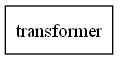

In [62]:
#from keras.models import Sequential
#from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(transformer,to_file='Arquitetura_Transformer-M_3LSTM.png',show_shapes=True,show_layer_names=True, show_layer_activations=True, expand_nested=True)#, rankdir='LR')

## 8. Realizando previsões

### 8.1. Previsões originais

In [63]:
# Avaliar o modelo nos dados de teste
loss = transformer.evaluate(X_teste, y_teste)

# Imprimir a perda
print("Perda nos dados de teste:", loss)

1/1 [==============================] - 10s 10s/step - loss: 0.0142 - mean_squared_error: 2.0123e-04 - mean_absolute_error: 0.0128 - accuracy: 1.0000
Perda nos dados de teste: [0.01418551616370678, 0.00020122886053286493, 0.012752383947372437, 1.0]


In [64]:
'''
previsoes = transformer.predict(X_teste)
previsoes = minmax.inverse_transform(previsoes)
display(X_teste.shape, previsoes.shape)
print(previsoes)
print(type(previsoes))
'''
#display(type(X_teste))

'\nprevisoes = transformer.predict(X_teste)\nprevisoes = minmax.inverse_transform(previsoes)\ndisplay(X_teste.shape, previsoes.shape)\nprint(previsoes)\nprint(type(previsoes))\n'

In [65]:
%%time
# Fazer as predições
predicoes = transformer.predict(X_teste)  # input_data
#previsoes = predicoes * -50.0
previsoes = minmax.inverse_transform(predicoes)

#previsoes = predicoes * (max_values - min_values) + min_values
previsoes = previsoes
# Definir o número desejado de casas decimais
num_decimals = 8

# Formatar os valores resultantes
previsoes = np.round(previsoes, num_decimals)

#display(df_locais)
#display(X_teste.shape, previsoes.shape)
display(previsoes)

1/1 [==============================] - 9s 9s/step


array([[ -3.8577754, -38.539284 ]], dtype=float32)

CPU times: total: 9.34 s
Wall time: 8.89 s


### 8.2. Ajustando Previsões originais para pontos possíveis

#### 8.2.1. Pontos possíveis deduplicados

In [66]:
possible_values = np.array(df_ft_min[['LocLat','LocLong']].drop_duplicates())
#possible_values = np.array(df_ft_min_n_seq[['LocLat','LocLong']].drop_duplicates())
len(possible_values)

294

#### 8.2.2. Ajustando primeiro Latitude e Longitude de forma separada e depois conjunta

In [67]:
# Ajustando separadamente as latitudes e longitudes dos valores possíveis
closest_latitudes = possible_values[:, 0]
closest_longitudes = possible_values[:, 1]

# Ajuste as latitudes das previsões para valores possíveis
adjusted_latitudes = [min(closest_latitudes, key=lambda x: abs(x - pred[0])) for pred in previsoes]
#print(adjusted_latitudes)

# Ajuste as longitudes das previsões para valores possíveis
adjusted_longitudes = [min(closest_longitudes, key=lambda x: abs(x - pred[1])) for pred in previsoes]
#print(adjusted_longitudes)

# Combine as latitudes e longitudes ajustadas
previsoes_separadas = np.column_stack((adjusted_latitudes, adjusted_longitudes))

#print(previsoes_separadas.shape, previsoes_separadas)

In [68]:
# Calcule as distâncias euclidianas entre as previsões e os valores possíveis
distances = cdist(previsoes_separadas, possible_values, metric='euclidean')

# Encontre o índice do valor possível mais próximo para cada previsão
closest_indices = np.argmin(distances, axis=1)

# Obtenha as localizações mais próximas
previsoes_ajustadas_separadas = possible_values[closest_indices]
previsoes_ajustadas = previsoes_ajustadas_separadas  # para compatibilidade com codigo anterior

#print(previsoes_ajustadas.shape, previsoes_ajustadas)

In [69]:
# Testando algumas previsões para confirmar que são valores possíveis
#print(possible_values[possible_values == [-15.9080336, -47.9691306]])

#### 8.2.3. Ajustando Latitude e Longitude somente de forma conjunta

In [70]:
# Calcule as distâncias euclidianas entre as previsões e os valores possíveis
distances = cdist(previsoes, possible_values, metric='euclidean')

# Encontre o índice do valor possível mais próximo para cada previsão
closest_indices = np.argmin(distances, axis=1)

# Obtenha as localizações mais próximas
previsoes_ajustadas_juntas = possible_values[closest_indices]

#print(previsoes_ajustadas.shape, previsoes_ajustadas)

## 9. Visualizando e analisando as previsões

### 9.1. Previsões de LATITUDE sem ajustes

Figure(640x480)
Figure(1200x600)


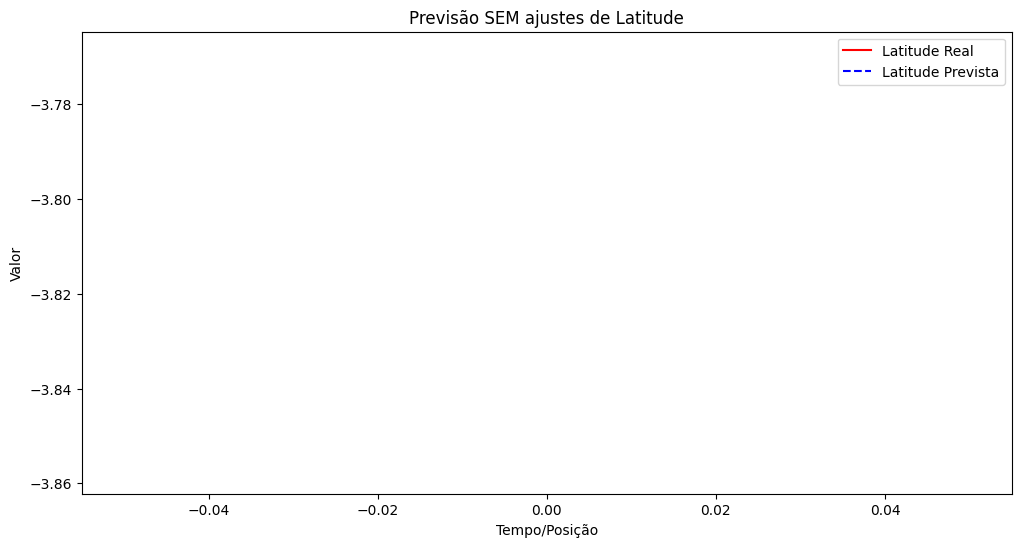

In [71]:
plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[0].head(100), color = 'red', label = 'Latitude Real')
#plt.plot(pd.DataFrame((y_teste)*-50.0)[0].head(100), color = 'red', label = 'Latitude Real')
#plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[1].head(100), color = 'black', label = 'Longitude Real')

plt.plot(pd.DataFrame(previsoes[:, 0]).head(100), color = 'blue', label = 'Latitude Prevista', ls="--")
#plt.plot(pd.DataFrame(previsoes[:, 1]).head(100), color = 'orange', label = 'Longitude Prevista')

fig = plt.gcf()
print(fig)
fig.set_size_inches(12, 6)
fig = plt.gcf()
print(fig)

plt.title('Previsão SEM ajustes de Latitude')
plt.xlabel('Tempo/Posição')
plt.ylabel('Valor')
plt.legend()

#plt.figure(figsize=(2000, 6000))
plt.show()

### 9.2. Previsões de LATITUDE com ajustes

In [72]:
pd.DataFrame(possible_values).sort_values(by=0, ascending = False).head(50)

,0,1
248,-2.90330,-39.9975
249,-2.91750,-40.4501
253,-3.13078,-40.8192
217,-3.34442,-39.4021
40,-3.40439,-39.2946
39,-3.40647,-39.2945
41,-3.52683,-39.0746
252,-3.52867,-39.0718
156,-3.57478,-41.0941
155,-3.57747,-41.0938


In [73]:
pd.DataFrame(minmax.inverse_transform(y_teste))[0].head(100)

0   -3.7691
Name: 0, dtype: float64

In [74]:
pd.DataFrame(previsoes[:, 0]).head(100)

,0
0,-3.857775


In [75]:
pd.DataFrame(previsoes_ajustadas[:, 0]).head(100)

,0
0,-3.83339


Figure(640x480)
Figure(1200x600)


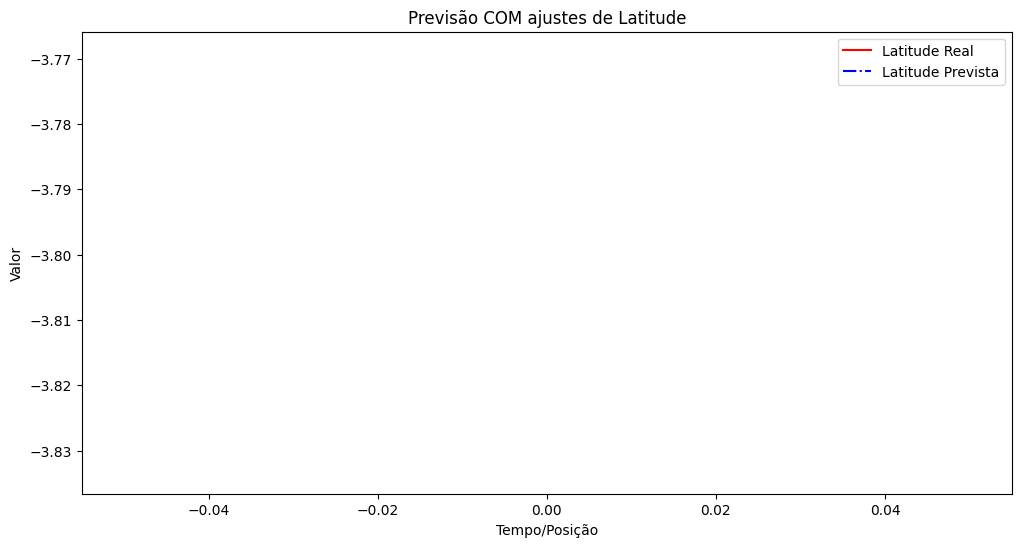

In [76]:
plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[0].head(100), color = 'red', label = 'Latitude Real')
#plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[1].head(100), color = 'black', label = 'Longitude Real')

plt.plot(pd.DataFrame(previsoes_ajustadas[:, 0]).head(100), color = 'blue', label = 'Latitude Prevista', ls="-.")
#plt.plot(pd.DataFrame(previsoes_ajustadas[:, 1]).head(100), color = 'orange', label = 'Longitude Prevista')

fig = plt.gcf()
print(fig)
fig.set_size_inches(12, 6)
fig = plt.gcf()
print(fig)

plt.title('Previsão COM ajustes de Latitude')
plt.xlabel('Tempo/Posição')
plt.ylabel('Valor')
plt.legend()

#plt.figure(figsize=(2000, 6000))
plt.show()

### 9.3. Previsões de LONGITUDE sem ajustes

Figure(640x480)
Figure(1200x600)


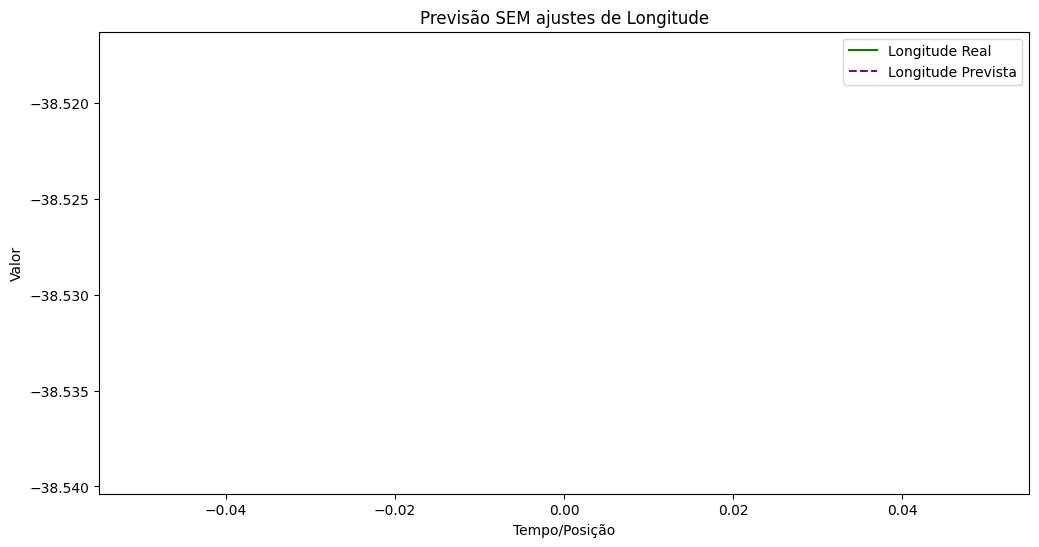

In [77]:
#plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[0].head(100), color = 'red', label = 'Latitude Real')
plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[1].head(100), color = 'green', label = 'Longitude Real')

#plt.plot(pd.DataFrame(previsoes[:, 0]).head(100), color = 'blue', label = 'Latitude Prevista')
plt.plot(pd.DataFrame(previsoes[:, 1]).head(100), color = 'purple', label = 'Longitude Prevista', ls="--")

fig = plt.gcf()
print(fig)
fig.set_size_inches(12, 6)
fig = plt.gcf()
print(fig)

plt.title('Previsão SEM ajustes de Longitude')
plt.xlabel('Tempo/Posição')
plt.ylabel('Valor')
plt.legend()
plt.show()

### 9.4. Previsões de LONGITUDE com ajustes

Figure(640x480)
Figure(1200x600)


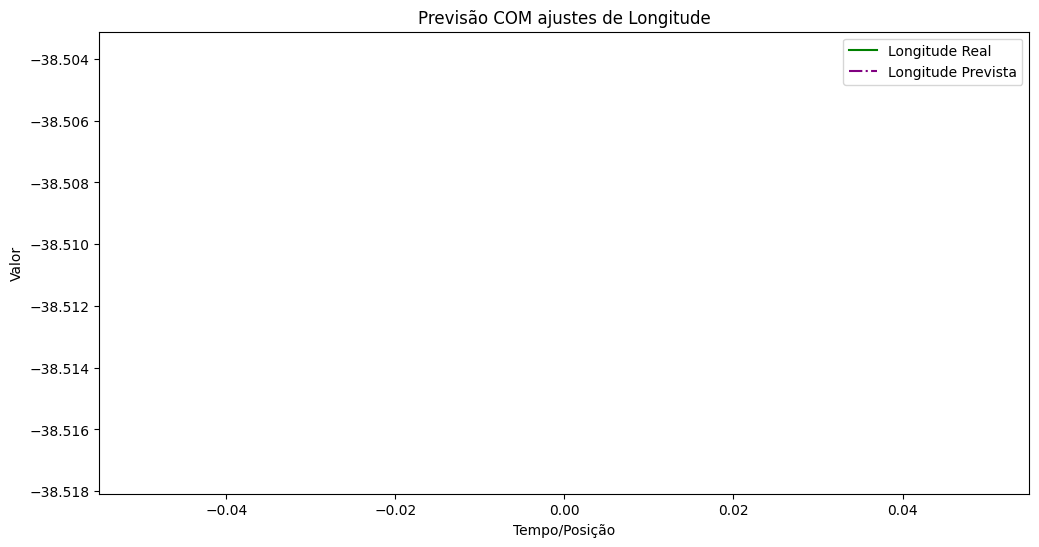

In [78]:
#plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[0].head(100), color = 'red', label = 'Latitude Real')
plt.plot(pd.DataFrame(minmax.inverse_transform(y_teste))[1].head(100), color = 'green', label = 'Longitude Real')

#plt.plot(pd.DataFrame(previsoes_ajustadas[:, 0]).head(100), color = 'blue', label = 'Latitude Prevista')
plt.plot(pd.DataFrame(previsoes_ajustadas[:, 1]).head(100), color = 'purple', label = 'Longitude Prevista', ls="-.")

fig = plt.gcf()
print(fig)
fig.set_size_inches(12, 6)
fig = plt.gcf()
print(fig)

plt.title('Previsão COM ajustes de Longitude')
plt.xlabel('Tempo/Posição')
plt.ylabel('Valor')
plt.legend()
plt.show()

### 9.5. Cálculo de Erro Médio e Acurácia das Previsões com ajustes

In [79]:
# Valores originais (latitudes e longitudes reais)
true_values = minmax.inverse_transform(y_teste)

# Previsões ajustadas
adjusted_predictions = previsoes_ajustadas

# Calcule as diferenças entre os valores originais e as previsões ajustadas
differences = true_values - adjusted_predictions

# Calcule a distância euclidiana para cada par de latitudes e longitudes
distances = np.linalg.norm(differences, axis=1)

# Calcule o erro médio
mean_error = np.mean(distances)

# Calcule a acurácia em percentagem
#accuracy = (1 - mean_error) * 100  # Converte o erro médio em acurácia

print("Erro Médio:", mean_error)
#print("Acurácia (%):", accuracy)

Erro Médio: 0.06571273925199077


## 10. Comparando acurácia das previsões

#### 10.1 Plotando Previsão e Realidade no Mapa

In [80]:
#previsoes_ajustadas[1]

In [81]:
#temp=pd.DataFrame()
#temp['LocLat'] = pd.DataFrame(previsoes_ajustadas[1]).iloc[0]
#temp['LocLong'] = pd.DataFrame(previsoes_ajustadas[1]).iloc[1]
#temp

In [82]:
#minmax.inverse_transform(X_teste[1])

In [83]:
#alertas_veiculo_pred = pd.DataFrame()
#alertas_veiculo_pred[['LocLat','LocLong']] = pd.DataFrame(minmax.inverse_transform(X_teste[1]))
#alertas_veiculo[['LocLat','LocLong']] = pd.concat([alertas_veiculo[['LocLat','LocLong']],temp])
#alertas_veiculo_pred

In [84]:
#temp=pd.DataFrame()
#temp['LocLat'] = pd.DataFrame(minmax.inverse_transform(y_teste)[1]).iloc[0]
#temp['LocLong'] = pd.DataFrame(minmax.inverse_transform(y_teste)[1]).iloc[1]
#temp

In [85]:
#minmax.inverse_transform(X_teste[1])

In [86]:
#pd.concat([alertas_veiculo[['LocLat','LocLong']],temp]).reset_index(drop=True)

In [87]:
#alertas_veiculo[['LocLat','LocLong']] = minmax.inverse_transform(X_teste[1])
#alertas_veiculo = pd.concat([alertas_veiculo[['LocLat','LocLong']],temp]).reset_index(drop=True)
#alertas_veiculo

In [88]:
#import pandas as pd
#import folium
#import fontawesome

# Identificador do veículo desejado
#veiculo_emp_id = 4830181

# Filtrar os alertas para o veículo especificado
#alertas_veiculo = df_all[df_all['EmpID'] == veiculo_emp_id].copy()
#alertas_veiculo = df_all[df_all['EmpID'] == veiculo_emp_id].copy()
#print("Quantidade total de registros de câmeras (sensores externos): " + str(len(alertas_veiculo)) + " para o veiculo_emp_id = " + str(veiculo_emp_id))
#print("LocID únicos: " + str(alertas_veiculo['LocID'].nunique()))
#print("Pontos (LocLat,LocLong) únicos:\n" + str(alertas_veiculo[['LocLat','LocLong']].nunique()))

# Ordenar os alertas pelo campo 'DataHora' e converter para o formato de data e hora
#alertas_veiculo['DataHora'] = pd.to_datetime(alertas_veiculo['DataHora'])
#alertas_veiculo = alertas_veiculo.sort_values(by='DataHora')
#display(alertas_veiculo)

indice = 0  # CE 3 PERTO / GO 8 ACERTOU
alertas_veiculo_pred = pd.DataFrame()
alertas_veiculo_pred[['LocLat','LocLong']] = pd.DataFrame(minmax_features.inverse_transform(X_teste[indice]))
#alertas_veiculo_pred[['LocLat','LocLong','LocID']] = pd.DataFrame(minmax_features.inverse_transform(X_teste[indice]))

# Adicionar posição futura real
temp=pd.DataFrame()
temp['LocLat'] = pd.DataFrame(minmax.inverse_transform(y_teste)[indice]).iloc[0]
temp['LocLong'] = pd.DataFrame(minmax.inverse_transform(y_teste)[indice]).iloc[1]
alertas_veiculo_pred = pd.concat([alertas_veiculo_pred[['LocLat','LocLong']],temp]).reset_index(drop=True)
#display(alertas_veiculo_pred[['LocLat','LocLong']])
# Adicionar posição futura prevista
temp['LocLat'] = pd.DataFrame(previsoes_ajustadas[indice]).iloc[0]
temp['LocLong'] = pd.DataFrame(previsoes_ajustadas[indice]).iloc[1]
alertas_veiculo_pred = pd.concat([alertas_veiculo_pred[['LocLat','LocLong']],temp]).reset_index(drop=True)
#display(alertas_veiculo_pred[['LocLat','LocLong']])


# Criar um mapa com centro na coordenada inicial do trajeto
m = folium.Map(location=[alertas_veiculo_pred['LocLat'].iloc[0],alertas_veiculo_pred['LocLong'].iloc[0]], zoom_start=15)

# Inicializar as coordenadas iniciais
latitude_anterior = None
longitude_anterior = None
contador = 1  # Inicializar o contador para numerar os marcadores
contador_x = 1
contadores_empilhados = {}  # Inicializar um dicionário para rastrear contadores empilhados

# Iterar pelos alertas e plotar o caminho do veículo
for index, alerta in alertas_veiculo_pred.iterrows():
    # Obter as coordenadas geográficas do local a partir do DataFrame
    #loc_id = alerta['LocID']
    latitude = alerta['LocLat']
    longitude = alerta['LocLong']
    
    # Verificar se a localização é a mesma que a anterior
    if (latitude, longitude) in contadores_empilhados:
        contadores_empilhados[(latitude, longitude)].append(contador)
    else:
        contadores_empilhados[(latitude, longitude)] = [contador]

    # Criar um ícone personalizado com imagem de pino de localização e texto do contador
    if contador == 1:
        contador_x = contador
        color_x = 'red'
        color='darkred'  # cor do ponto inicial
    elif contador == (len(alertas_veiculo_pred)-1):
        contador_x = "Real"
        color_x = 'red'
        color='red'  # cor do penúltimo ponto (ponto FUTURO REAL)
    elif contador == len(alertas_veiculo_pred):
        contador_x = "Previsto"
        color_x = 'purple'
        color='purple'  # cor do ponto final (ponto FUTURO PREVISTO)
    else: 
        contador_x = contador
        color_x = 'red'
        color='darkorange'  # cor dos pontos intermediários
    top = -18 - 20*len(contadores_empilhados[(latitude, longitude)])
    icon = folium.DivIcon(html=f'''
        <div style="position: relative;">
            <i class="fas fa-map-marker-alt" style="position: absolute; top: -19px; left: 5.5px; color: {color}; font-size: 40px; opacity: 0.7;"></i> <!-- Ícone de pino de localização -->
            <span style="position: absolute; top: {top}px; left: 0; width: 100%; opacity: 0.7; text-align: center; font-size: 14px; color: white; background-color: {color}; border-radius: 50%;">{contador_x}</span>
        </div>
    ''', icon_size=(40, 40))
    
    # Adicionar marcadores nos pontos de alerta com o ícone personalizado
    #data_hora = alerta['DataHora'].strftime('%Y-%m-%d %H:%M:%S')
    #folium.Marker([latitude, longitude], icon=icon, popup=f'{contador}-Data/Hora:{data_hora}').add_to(m)
    folium.Marker([latitude, longitude], icon=icon, popup=f'{contador}').add_to(m)
    
    # Verificar se há coordenadas anteriores para traçar uma linha entre os pontos
    if latitude_anterior is not None and longitude_anterior is not None:
        folium.PolyLine([(latitude_anterior, longitude_anterior), (latitude, longitude)], color=color_x, weight=3, opacity=0.6).add_to(m)
    
    # Atualizar as coordenadas anteriores e o contador
    latitude_anterior = latitude
    longitude_anterior = longitude
    contador += 1

# Exibir o mapa com o caminho do veículo
#m.save('caminho_veiculo.html')  # Salvar o mapa em um arquivo HTML para visualização
m

#### 10.2 Analisando a Precisão da Acurácia

In [89]:
print(len(true_values[true_values[:,0:2] == previsoes_ajustadas_separadas[:,0:2]]))
true_values[true_values[:,0:2] == previsoes_ajustadas_separadas[:,0:2]]

0


array([], dtype=float64)

In [90]:
num_elementos_iguais = np.sum(
    [f"{valor:.4f}" == f"{previsao:.4f}" for valor, previsao in zip(true_values[:, 0], previsoes_ajustadas_juntas[:, 0])]
)

print(num_elementos_iguais)

0


In [91]:
tf.keras.metrics.Accuracy(name="accuracy", dtype=None)

print("---------------------")
print("- #### Número de previsores (n_seq) =", n_seq)
print("- #### Número de previsões (Lat e Long) =", len(previsoes[:,1]))  # , true_values.shape)

# Previsões originais
m1 = tf.keras.metrics.Accuracy()
print("\n #### Previsões originais:")
m1.update_state(previsoes, true_values)
print("- ##### Número de acertos de próximo sensor externo:", len(true_values[true_values[:,1] == previsoes[:,1]]))
print("- ##### Acurácia:", m1.result().numpy())

# Previsões ajustadas separadamente e depois conjuntamente
m2 = tf.keras.metrics.Accuracy()
print("\n #### Previsões ajustadas separadamente e depois conjuntamente:")
m2.update_state(previsoes_ajustadas_separadas, true_values)
print("- ##### Número de acertos de próximo sensor externo:", len(true_values[(true_values[:,0] == previsoes_ajustadas_separadas[:,0]) & 
                                                                  (true_values[:,1] == previsoes_ajustadas_separadas[:,1])]))
print("- ##### Acurácia:", m2.result().numpy())

# Previsões ajustadas somente conjuntamente
m3 = tf.keras.metrics.Accuracy()
print("\n #### Previsões ajustadas somente conjuntamente:")
m3.update_state(previsoes_ajustadas_juntas, true_values)
print("- ##### Número de acertos de próximo sensor externo:", len(true_values[(true_values[:,0] == previsoes_ajustadas_juntas[:,0]) & 
                                                                  (true_values[:,1] == previsoes_ajustadas_juntas[:,1])]))
print("- ##### Acurácia:", m3.result().numpy())


print("\n- ##### Número de acertos ARREDONDADOS de próximo sensor externo:", len(true_values[(np.round(true_values[:,0],2) == np.round(previsoes_ajustadas_juntas[:,0],2)) & 
                                                                  (np.round(true_values[:,1],2) == np.round(previsoes_ajustadas_juntas[:,1],2))]))
#np.round(previsoes, num_decimals)

print("---------------------")

#print(previsoes.shape, true_values.shape)
#print(previsoes[:,1])

---------------------
- #### Número de previsores (n_seq) = 30
- #### Número de previsões (Lat e Long) = 1

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

- ##### Número de acertos ARREDONDADOS de próximo sensor externo: 0
---------------------


In [92]:
previsoes_ajustadas_separadas

array([[ -3.83339, -38.5038 ]])

In [93]:
#true_values['PAS_lat'] = previsoes_ajustadas_separadas['LocLat']
#true_values['PAS_long'] = previsoes_ajustadas_separadas['LocLong']
true_values

array([[ -3.7691, -38.5174]])

In [94]:
from sklearn.metrics import mean_absolute_error as mae_2

# Calcule o MAE global usando scikit-learn
mae_global = mae_2(true_values, adjusted_predictions)

print("Mean Absolute Error (MAE) Global: ", mae_global)

Mean Absolute Error (MAE) Global:  0.038945000000002006


In [95]:
m = tf.keras.metrics.Accuracy()
m.update_state([[1,1], [2,2], [3,1], [4,1]], [[0,1], [2,1], [3,1], [4,1]])
m.result().numpy()

0.75

## 11. Registro de resultados

---------------------
- #### Número de previsores (n_seq) = 8
- #### Número de previsões (Lat e Long) = 1574

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 46
- ##### Acurácia: 0.029542567

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 39
- ##### Acurácia: 0.025095299
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 45
- ##### Acurácia: 0.03217993

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 43
- ##### Acurácia: 0.030795848
---------------------

---------------------
- #### Número de previsores (n_seq) = 10
- #### Número de previsões (Lat e Long) = 1335

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 33
- ##### Acurácia: 0.025468165

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 31
- ##### Acurácia: 0.023970038
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 40
- ##### Acurácia: 0.028027682

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 46
- ##### Acurácia: 0.03217993
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.00034602077

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 45
- ##### Acurácia: 0.031141868

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 45
- ##### Acurácia: 0.03183391
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 55
- ##### Acurácia: 0.038062282

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 51
- ##### Acurácia: 0.03529412
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 43
- ##### Acurácia: 0.030795848

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 39
- ##### Acurácia: 0.028027682
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 38
- ##### Acurácia: 0.027681662

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 40
- ##### Acurácia: 0.029411765
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 39
- ##### Acurácia: 0.028027682

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 39
- ##### Acurácia: 0.027681662
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 49
- ##### Acurácia: 0.033910036

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 48
- ##### Acurácia: 0.033217993
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 48
- ##### Acurácia: 0.033217993

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 46
- ##### Acurácia: 0.03183391
---------------------

---------------------
- #### Número de previsores (n_seq) = 40
- #### Número de previsões (Lat e Long) = 310

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 10
- ##### Acurácia: 0.032258064

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 9
- ##### Acurácia: 0.029032258
---------------------

---------------------
- #### Número de previsores (n_seq) = 40
- #### Número de previsões (Lat e Long) = 310

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 9
- ##### Acurácia: 0.029032258

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 9
- ##### Acurácia: 0.029032258
---------------------

---------------------
- #### Número de previsores (n_seq) = 9
- #### Número de previsões (Lat e Long) = 1445

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 47
- ##### Acurácia: 0.032525953

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 45
- ##### Acurácia: 0.031141868
---------------------

---------------------
- #### Número de previsores (n_seq) = 40
- #### Número de previsões (Lat e Long) = 310

 #### Previsões originais:
- ##### Número de acertos de próximo sensor externo: 0
- ##### Acurácia: 0.0

 #### Previsões ajustadas separadamente e depois conjuntamente:
- ##### Número de acertos de próximo sensor externo: 27
- ##### Acurácia: 0.08709677

 #### Previsões ajustadas somente conjuntamente:
- ##### Número de acertos de próximo sensor externo: 25
- ##### Acurácia: 0.08064516
---------------------

# Fim.